In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from pylab import rcParams
from matplotlib.patches import RegularPolygon
v

import math
import os

In [4]:
tc2words = pd.read_csv('../data/ECON_TC_to_bits.csv')
tc2words.columns = ['occupancy', 'words', 'elinks']
tc2words.set_index('occupancy', inplace=True)

def word_count(row):
    ntc = row.ntc
    return tc2words.loc[ntc]['words']

def link_count(row):
    ntc = row.ntc
    return tc2words.loc[ntc]['elinks']

def words_count_interp(row):
    ntc = row.occupancy
    words = np.interp(ntc, tc2words.reset_index().occupancy, tc2words.reset_index().words)
    return words

In [24]:
def elinks_test(row):
    occ = row.occupancy
    occ_30 = int(min(np.ceil(occ*1.3), 48))
    words_30 = int(np.ceil(row.words*1.3))
    #occ_30 = int(np.ceil(occ*1.3))
    #words = tc2words.loc[occ_30].words
    elinks = int(np.ceil(words_30/2.))
    return elinks
tc2wordstest = tc2words.reset_index()
#tc2wordstest.apply(elinks_test, axis=1)
tc2wordstest['elinks_test'] = tc2wordstest.apply(elinks_test, axis=1)
tc2wordstest

occupancy  words  elinks  elinks_test
0           0      1       1            1
1           1      2       2            2
2           2      3       2            2
3           3      4       3            3
4           4      5       4            4
5           5      6       4            4
6           6      7       5            5
7           7      7       5            5
8           8      8       6            6
9           9      8       6            6
10         10      9       6            6
11         11      9       6            6
12         12     10       7            7
13         13     10       7            7
14         14     11       8            8
15         15     11       8            8
16         16     11       8            8
17         17     12       8            8
18         18     12       8            8
19         19     13       9            9
20         20     13       9            9
21         21     14      10           10
22         22     14      10           10
23         23     15      10           10
24         24     15      10           10
25         25     15      10           10
26         26     16      11           11
27         27     16      11           11
28         28     17      12           12
29         29     17      12           12
30         30     18      12           12
31         31     18      12           12
32         32     18      12           12
33         33     19      13           13
34         34     19      13           13
35         35     20      13           13
36         36     20      13           13
37         37     21      14           14
38         38     21      14           14
39         39     22      15           15
40         40     22      15           15
41         41     22      15           15
42         42     23      15           15
43         43     23      15           15
44         44     24      16           16
45         45     24      16           16
46         46     25      17           17
47         47     25      17           17
48         48     25      17           17

In [32]:
df_testlinks = pd.DataFrame({'occupancy':np.arange(0., 48.1, 0.1)})
df_testlinks['ntc'] = np.ceil(np.minimum(df_testlinks.occupancy*1.3, 48))
df_testlinks['words_1'] = df_testlinks.apply(word_count, axis=1)
df_testlinks['elinks_1'] = np.ceil(df_testlinks.words_1/2.)
df_testlinks['words_2'] = df_testlinks.apply(words_count_2, axis=1)
df_testlinks['elinks_2'] = np.ceil(np.minimum(df_testlinks.words_2*1.3,25)/2.)
df_testlinks

occupancy   ntc  words_1  elinks_1  words_2  elinks_2
0          0.0   0.0        1       1.0      1.0       1.0
1          0.1   1.0        2       1.0      1.1       1.0
2          0.2   1.0        2       1.0      1.2       1.0
3          0.3   1.0        2       1.0      1.3       1.0
4          0.4   1.0        2       1.0      1.4       1.0
..         ...   ...      ...       ...      ...       ...
476       47.6  48.0       25      13.0     25.0      13.0
477       47.7  48.0       25      13.0     25.0      13.0
478       47.8  48.0       25      13.0     25.0      13.0
479       47.9  48.0       25      13.0     25.0      13.0
480       48.0  48.0       25      13.0     25.0      13.0

[481 rows x 6 columns]

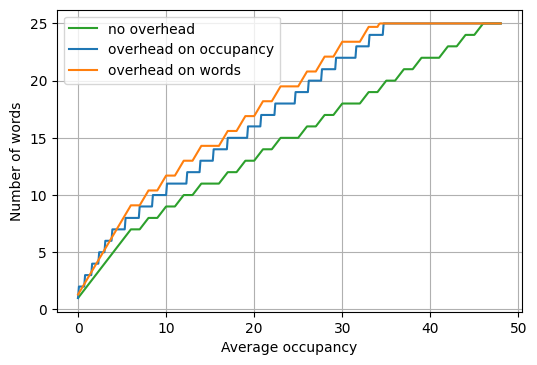

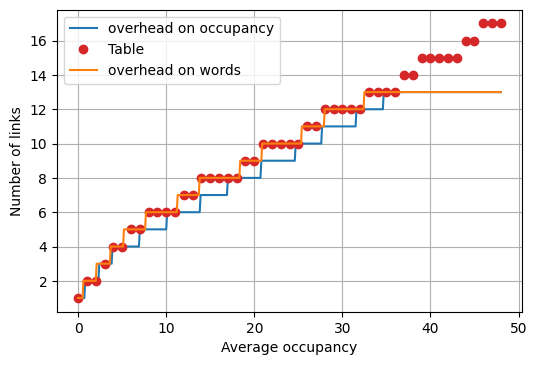

In [47]:

plt.subplots(dpi=100)
plt.plot(df_testlinks.occupancy, df_testlinks.words_2, label='no overhead', c='tab:green')
plt.plot(df_testlinks.occupancy, df_testlinks.words_1, label='overhead on occupancy', c='tab:blue')
plt.plot(df_testlinks.occupancy, np.minimum(df_testlinks.words_2*1.3,25), label='overhead on words', c='tab:orange')
plt.xlabel('Average occupancy')
plt.ylabel('Number of words')
plt.grid()
plt.legend()
plt.show()
#
plt.subplots(dpi=100)
plt.plot(df_testlinks.occupancy, df_testlinks.elinks_1, label='overhead on occupancy', c='tab:blue')
plt.plot(tc2words.reset_index().occupancy, tc2words.reset_index().elinks, 'o', label='Table', c='tab:red')
plt.plot(df_testlinks.occupancy, df_testlinks.elinks_2, label='overhead on words', c='tab:orange')
plt.xlabel('Average occupancy')
plt.ylabel('Number of links')
plt.grid()
plt.legend()
plt.show()

In [5]:
def interp(row):
    row['th_index'] = (row.threshold*100).astype('int32')
    df_interp = pd.DataFrame({'threshold':np.arange(0.,10.01,0.01)})
    df_interp['th_index'] = (df_interp.threshold*100).astype('int32')
    row_cp = row.set_index('th_index')
    row_cp.occupancy_overhead[0] = 48
    #row_cp.sort_index(inplace=True)
    df_interp.set_index('th_index',inplace=True)
    #print(row_cp)
    df_interp['occupancy_overhead'] = row_cp.occupancy_overhead
    df_interp['occupancy_overhead'] = df_interp.occupancy_overhead.interpolate()
    df_interp['ntc'] = np.ceil(df_interp.occupancy_overhead).astype('int32')
    #df_interp['elinks'] = df_interp.apply(link_count, axis=1)
    df_interp['words'] = df_interp.apply(word_count, axis=1)
    df_interp['elinks'] = np.ceil(df_interp.words/2.).astype('int32')
    min_th = df_interp.groupby('elinks').min().reset_index()[['elinks', 'threshold']].set_index('elinks')
    #print(min_th)
    return min_th

def interp2(row):
    row['th_index'] = (row.threshold*100).astype('int32')
    df_interp = pd.DataFrame({'threshold':np.arange(0.,10.01,0.01)})
    df_interp['th_index'] = (df_interp.threshold*100).astype('int32')
    row_cp = row.set_index('th_index')
    row_cp.mean_occupancy[0] = 48
    #row_cp.sort_index(inplace=True)
    df_interp.set_index('th_index',inplace=True)
    #print(row_cp)
    df_interp['occupancy'] = row_cp.mean_occupancy
    df_interp['occupancy'] = df_interp.occupancy.interpolate()
    df_interp['words'] = df_interp.apply(words_count_interp, axis=1)
    df_interp['elinks'] = np.ceil(np.minimum(df_interp.words*1.3,25)/2.).astype('int32')
    min_th = df_interp.groupby('elinks').min().reset_index()[['elinks', 'threshold']].set_index('elinks')
    #print(min_th)
    return min_th

In [7]:
version = 'TT_TuneCP5_14TeV-powheg-pythia8_Phase2HLTTDRWinter20DIGI-PU200_110X_mcRun4_realistic_v3-v2_201130'
input_file_template = '../scripts/results/occupancies_{}.csv'
input_file = input_file_template.format(version)
df = pd.read_csv(input_file)
df['occupancy_overhead'] = np.minimum(df['mean_occupancy']*1.3,48)
#df.groupby('filename').apply(lambda group: group.interpolate(method='index'))
#df['ntc'] = np.ceil(df.mean_occupancy).astype('int32')
#df['words'] = df.apply(word_count, axis=1)
#df.set_index(['threshold','layer','waferu','waferv'], inplace=True)

In [64]:
df_interpolated = df.groupby(['layer', 'waferu', 'waferv']).apply(interp2)

In [65]:
#df_interpolated.to_csv('../scripts/results/elinks_interpolated_overheadwords_{}.csv'.format(version))
df_interpolated.query('layer==27')

threshold
layer waferu waferv elinks           
27    1      2      1            1.92
                    2            0.87
                    3            0.54
                    4            0.49
                    5            0.46
...                               ...
      11     7      9            0.29
                    10           0.24
                    11           0.22
                    12           0.17
                    13           0.00

[1430 rows x 1 columns]

In [8]:
df_interpolated = pd.read_csv('../scripts/results/elinks_interpolated_overheadwords_{}.csv'.format(version))

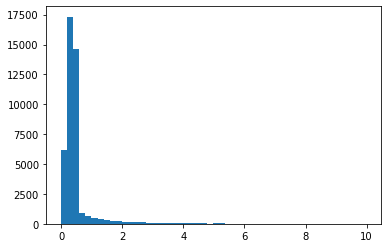

In [9]:
#plt.hist(df_interpolated.elinks)
#plt.show()
plt.hist(df_interpolated.threshold, bins=50)
plt.show()

In [10]:
df_test = df_interpolated.reset_index().set_index(['layer', 'waferu', 'waferv']).loc[11,1,3].set_index('elinks')

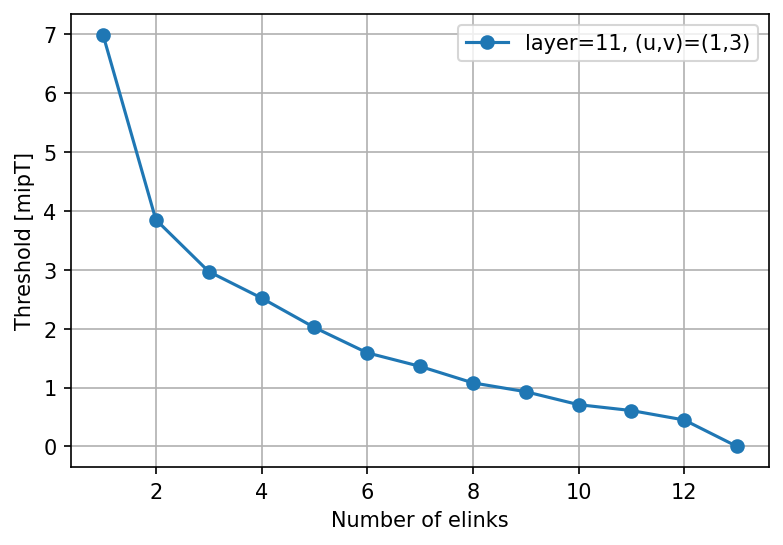

In [11]:
plt.subplots(dpi=150)
plt.plot(df_test['threshold'], 'o-', label='layer=11, (u,v)=(1,3)')
plt.grid()
plt.xlabel('Number of elinks')
plt.ylabel('Threshold [mipT]')
plt.legend()
plt.show()

In [45]:
plt.plot(df_interpolated.loc[1,1,2].mean_occupancy)

AttributeError: 'DataFrame' object has no attribute 'mean_occupancy'

In [12]:
#wafer_size = 166.4408 #mm (see https://github.com/cms-sw/cmssw/blob/master/Geometry/HGCalCommonData/data/hgcal/v14/hgcal.xml) 
wafer_flattoflat = 167.4408 #mm 
wafer_outerradius = wafer_flattoflat/math.sqrt(3)
columns = ['layer', 'shape', 'thickness', 'x', 'y', 'rotation', 'u', 'v']
modules = pd.read_csv('../data/geomnew_corrected_withmult_F_rotations_v11.1.txt', sep=' ', names=columns)
modules.set_index(['layer', 'u', 'v'], inplace=True)
modules

shape  thickness       x      y  rotation
layer u v                                          
1     3 0     F        120   502.3    0.0         0
      4 0     F        120   669.8    0.0         0
      5 0     F        200   837.2    0.0         0
      6 0     F        200  1004.6    0.0         0
      7 0     F        200  1172.1    0.0         0
...         ...        ...     ...    ...       ...
50    7 6     a        300   669.8  773.4         1
        5     b        300   753.5  628.4         1
        4     b        300   837.2  483.4         1
        3     b        300   920.9  338.4         1
        2     a        300  1004.6  193.3         0

[4899 rows x 5 columns]

In [13]:
def x_position(row):
    try:
        x = modules.loc[(row.layer, row.waferu, row.waferv)].x
    except KeyError:
        x = np.nan
    return x

def y_position(row):
    try:
        y = modules.loc[(row.layer, row.waferu, row.waferv)].y
    except KeyError:
        y = np.nan
    return y

In [14]:
df_interpolated.reset_index(inplace=True)
df_interpolated['x'] = df_interpolated.apply(x_position, axis=1)
df_interpolated['y'] = df_interpolated.apply(y_position, axis=1)
df

threshold  layer  waferu  waferv  mean_occupancy  mean_words  \
0            0.5      1       1       2       25.050631   15.396730   
1            0.5      1       1       3       32.929719   18.864888   
2            0.5      1       1       4       19.982215   13.209552   
3            0.5      1       1       5       13.294033   10.231354   
4            0.5      1       1       6        8.725330    7.989099   
...          ...    ...     ...     ...             ...         ...   
95544       10.0     50       7       2        0.000430    1.000430   
95545       10.0     50       7       3        0.001004    1.001004   
95546       10.0     50       7       4        0.001147    1.001147   
95547       10.0     50       7       5        0.000717    1.000717   
95548       10.0     50       7       6        0.000430    1.000430   

       occupancy_overhead  
0               32.565820  
1               42.808635  
2               25.976879  
3               17.282243  
4               11.342929  
...                   ...  
95544            0.000559  
95545            0.001305  
95546            0.001492  
95547            0.000932  
95548            0.000559  

[95549 rows x 7 columns]

In [15]:
df_interpolated

index  layer  waferu  waferv  elinks  threshold      x      y
0          0      1       1       2       1       5.36    0.0  290.0
1          1      1       1       2       2       3.34    0.0  290.0
2          2      1       1       2       3       2.73    0.0  290.0
3          3      1       1       2       4       2.38    0.0  290.0
4          4      1       1       2       5       1.99    0.0  290.0
...      ...    ...     ...     ...     ...        ...    ...    ...
42818  42818     50       7       6       9       0.29  669.8  773.4
42819  42819     50       7       6      10       0.24  669.8  773.4
42820  42820     50       7       6      11       0.21  669.8  773.4
42821  42821     50       7       6      12       0.17  669.8  773.4
42822  42822     50       7       6      13       0.00  669.8  773.4

[42823 rows x 8 columns]

In [106]:

# set up figure

# list to hold patches
patch_list = []
thresholds = []
xys = [] 

#cmap = cm.get_cmap('inferno')
# creat the patches
for row in df_interpolated.query('layer==1 & elinks==4').iterrows():
    threshold = row[1].threshold
    #if np.isnan(threshold): continue
    #print(threshold/5.)
    #rgba = cmap(threshold/5.)
    thresholds.append(threshold)
    xys.append((row[1].x, row[1].y))
    #patch_list.append(plt.Circle([row[1].x, row[1].y], wafer_outerradius))
    patch_list.append(
            RegularPolygon(
                    xy=(row[1].x, row[1].y),
                    numVertices=6,
                    radius=wafer_outerradius,
                    orientation=0.,
                    #facecolor=rgba,
                    #edgecolor='k'  
            )
    )


In [107]:
df_test = df.set_index(['layer', 'waferu', 'waferv']).loc[1,1,2].reset_index()[['threshold', 'mean_occupancy']]
df_test['th_index'] = (df_test.threshold*100).astype('int32')
df_empty = pd.DataFrame({'threshold':np.arange(0.5,5.01,0.01)})
df_empty['th_index'] = (df_empty.threshold*100).astype('int32')
df_test.set_index('th_index',inplace=True)
df_empty.set_index('th_index',inplace=True)
df_empty['mean_occupancy'] = df_test.mean_occupancy

/opt/exp_soft/llr/python/3.7.0/el7/lib/python3.7/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


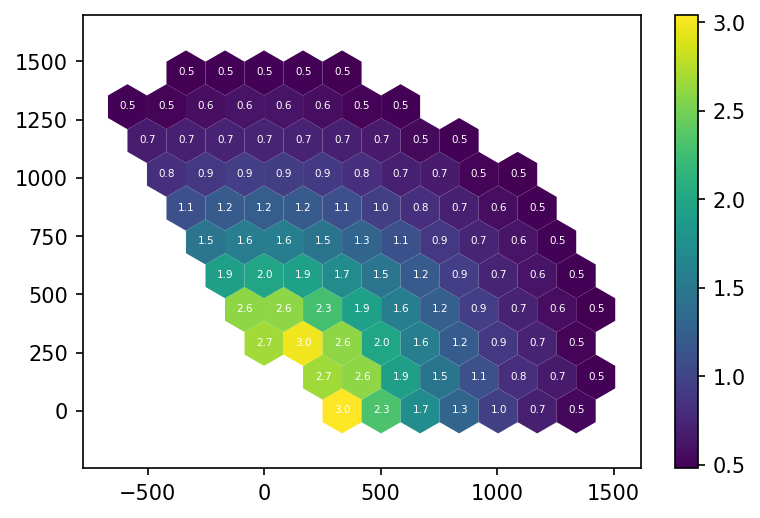

In [108]:

values = np.array(thresholds)
col = PatchCollection(patch_list)
col.set(array=values, cmap='viridis')

fig, ax = plt.subplots(dpi=150)

ax.add_collection(col)
ax.autoscale()
ax.axis('equal')

for xy,th in zip(xys, thresholds):
    plt.text(xy[0]-0.2*wafer_flattoflat, xy[1]-0.05*wafer_flattoflat, f'{th:3.1f}', fontsize=5, color='white')

fig.colorbar(col)
plt.show()

In [16]:
def links_signaldriven(layer):
    links = 2
    if layer==9:
        links = 5
    elif layer==7 or layer==11:
        links = 4
    elif layer==13:
        links = 3
    return links

def links_signaldriven_capped(layer):
    links = 2
    if layer>=7 and layer<=13:
        links = 4
    return links

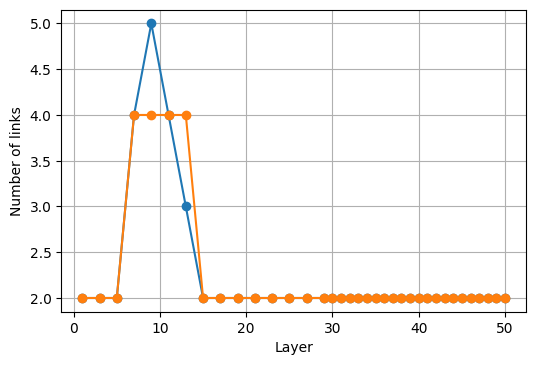

In [17]:
layers = np.append(np.arange(1,28,2), np.arange(29, 51, 1))
nlinks_signaldriven = np.array([links_signaldriven(x) for x in layers])
nlinks_signaldriven_capped = np.array([links_signaldriven_capped(x) for x in layers])
plt.subplots(dpi=100)
plt.plot(layers, nlinks_signaldriven, 'o-')
plt.plot(layers, nlinks_signaldriven_capped, 'o-')
plt.grid()
plt.xlabel('Layer')
plt.ylabel('Number of links')
plt.show()

In [18]:
def plot_sector(group, links=links_signaldriven):
    patch_list = []
    thresholds = []
    xys = [] 
    group_layer = group.layer.array[0]
    elinks = links(group_layer)

    for row in group.query('elinks=={}'.format(elinks)).iterrows():
        #threshold = np.max(row[1].threshold, 0.5)
        threshold = max(row[1].threshold, 0.5)
        thresholds.append(threshold)
        xys.append((row[1].x, row[1].y))
        patch_list.append(
                RegularPolygon(
                        xy=(row[1].x, row[1].y),
                        numVertices=6,
                        radius=wafer_outerradius,
                        orientation=0.,
                )
        )
    col = PatchCollection(patch_list)
    col.set(array=np.array(thresholds), cmap='viridis')
    col.set_clim([0.5, 8.])

    fig, ax = plt.subplots(dpi=150)

    ax.add_collection(col)
    ax.autoscale()
    ax.axis('equal')
    ax.set_xlabel('x [mm]')
    ax.set_ylabel('y [mm]')

    for xy,th in zip(xys, thresholds):
        plt.text(xy[0]-0.2*wafer_flattoflat, xy[1]-0.05*wafer_flattoflat, f'{th:3.1f}', fontsize=5, color='white')

    plt.text(0.98, 0.95, 'Layer {0}: {1} elinks'.format(group_layer, elinks), horizontalalignment='right', transform=ax.transAxes)
    fig.colorbar(col)
    plt.show()

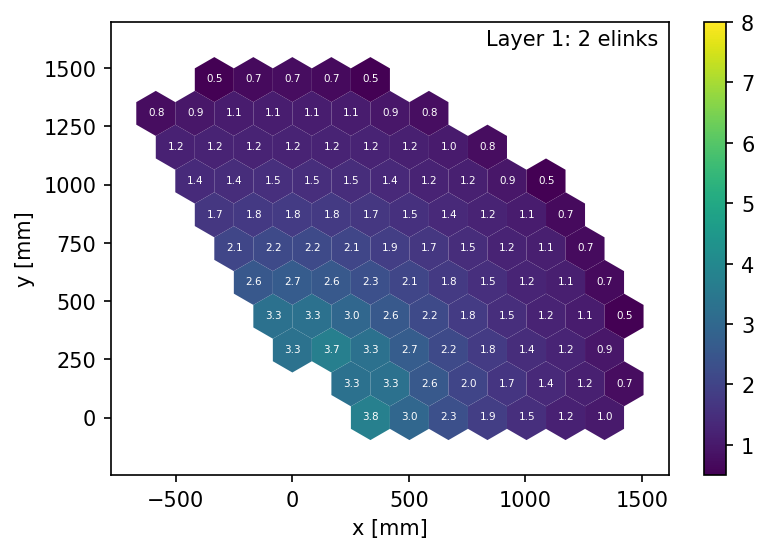

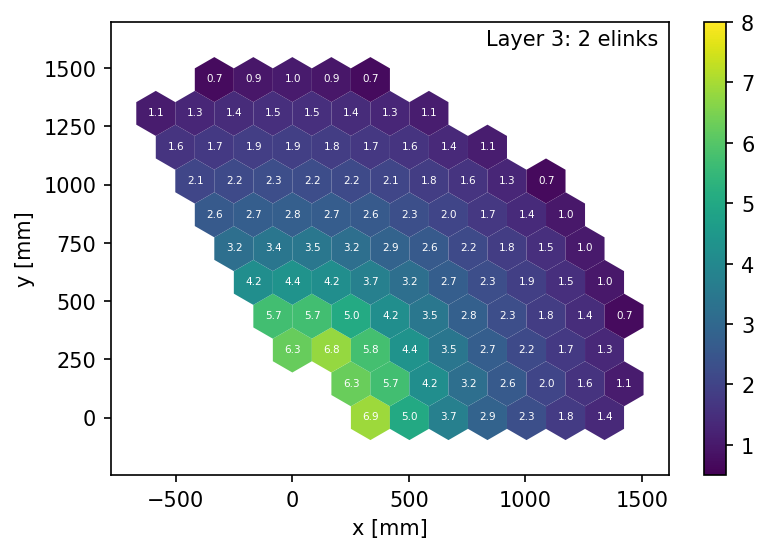

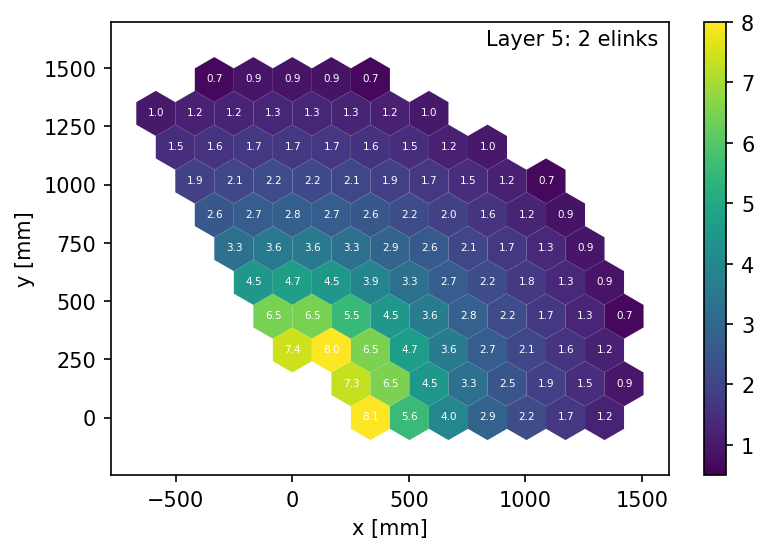

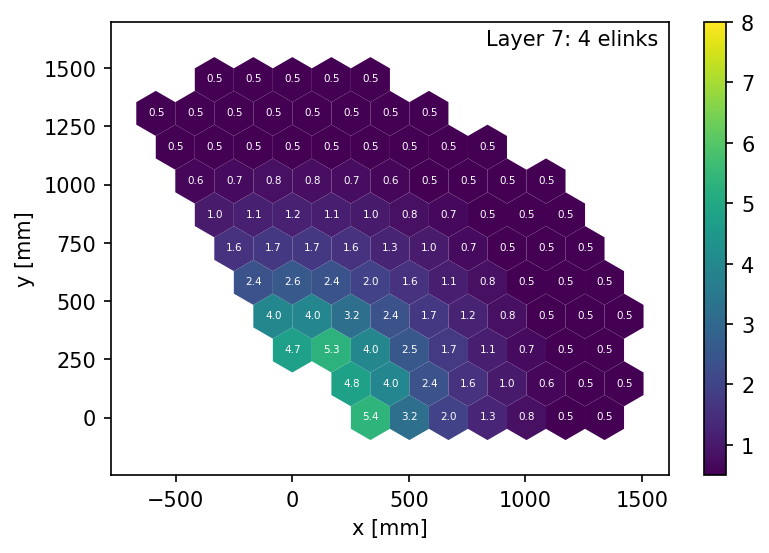

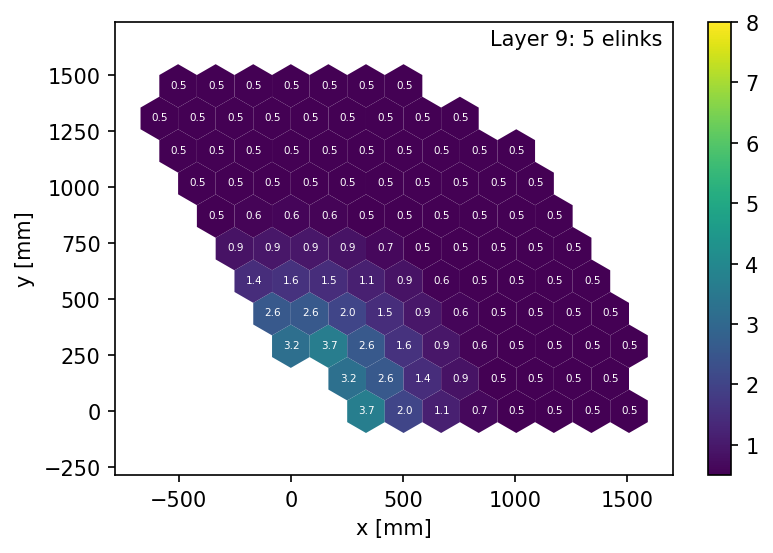

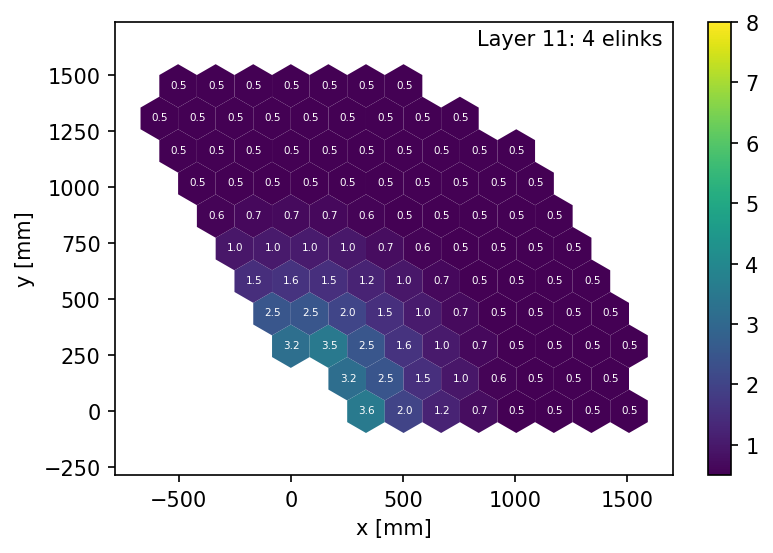

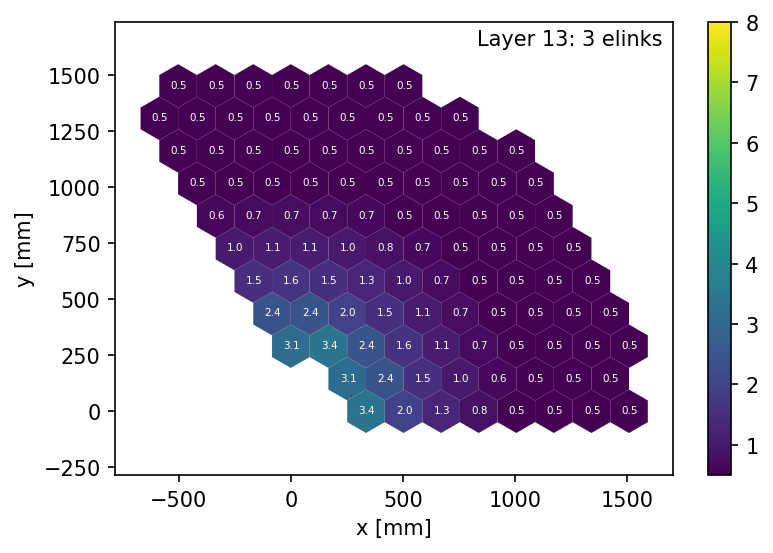

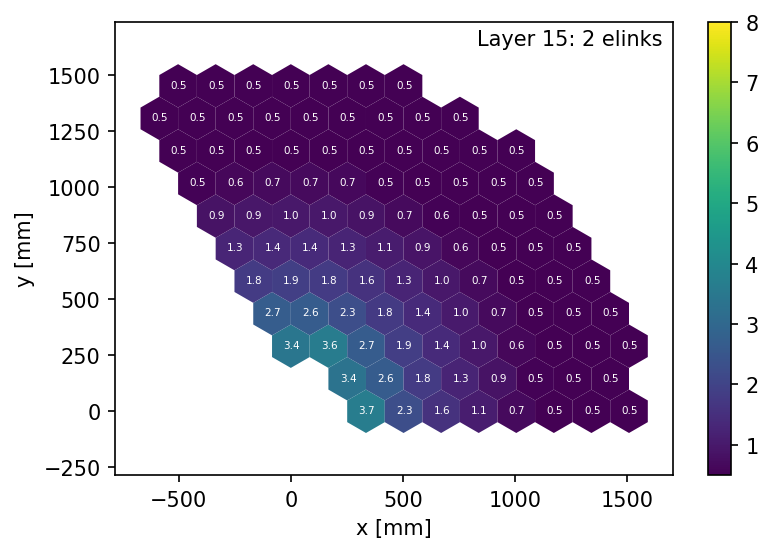

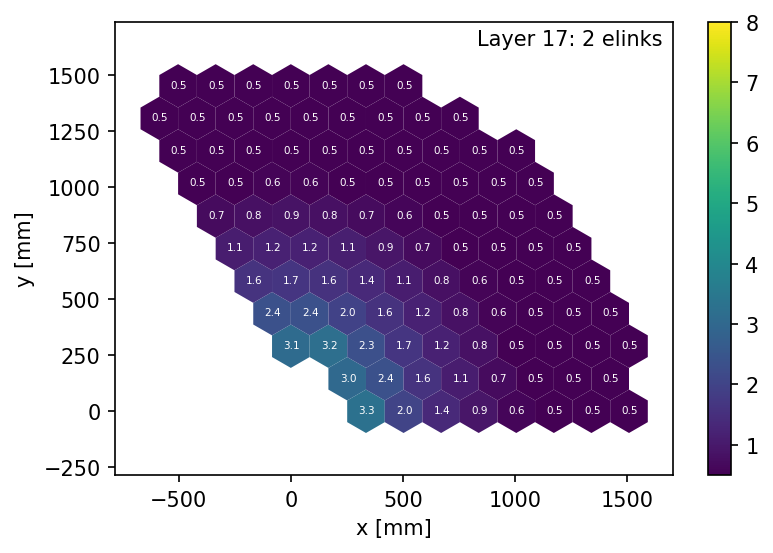

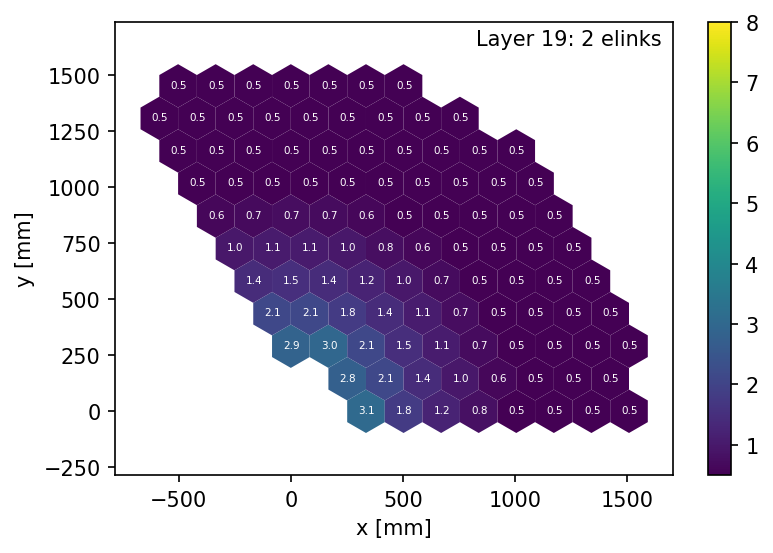

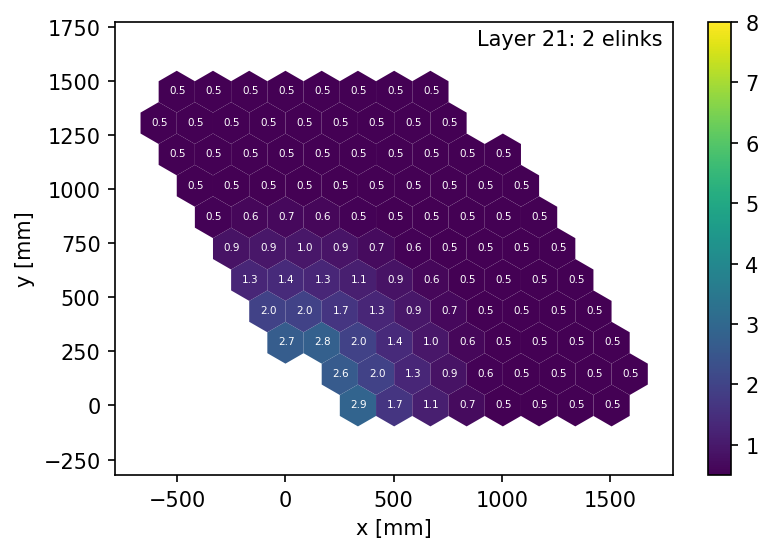

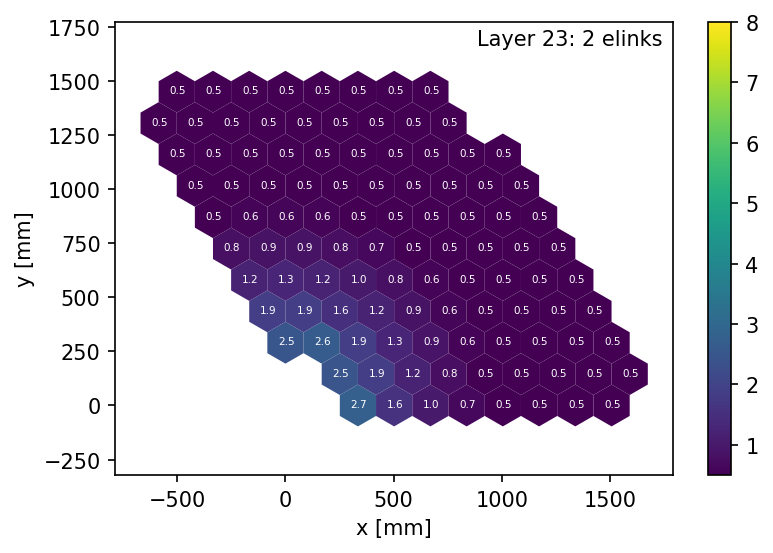

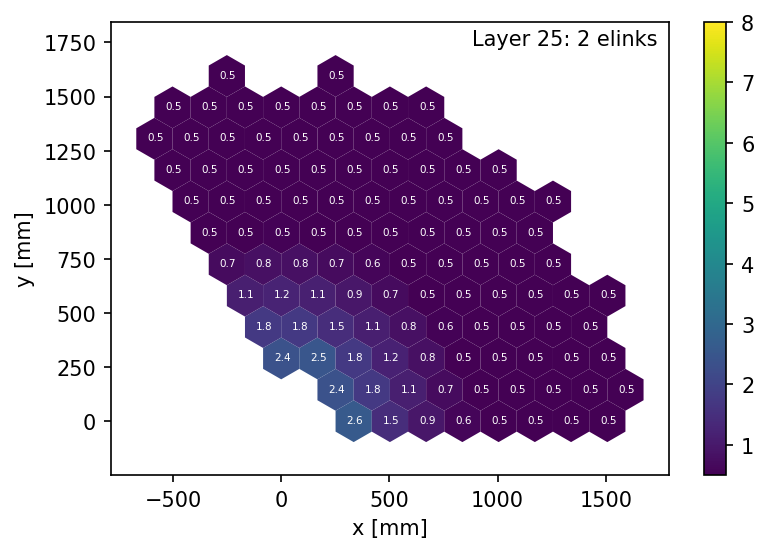

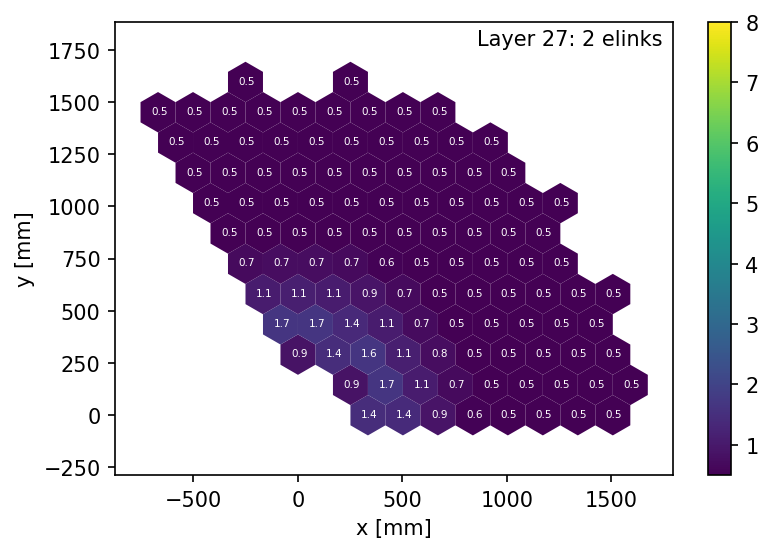

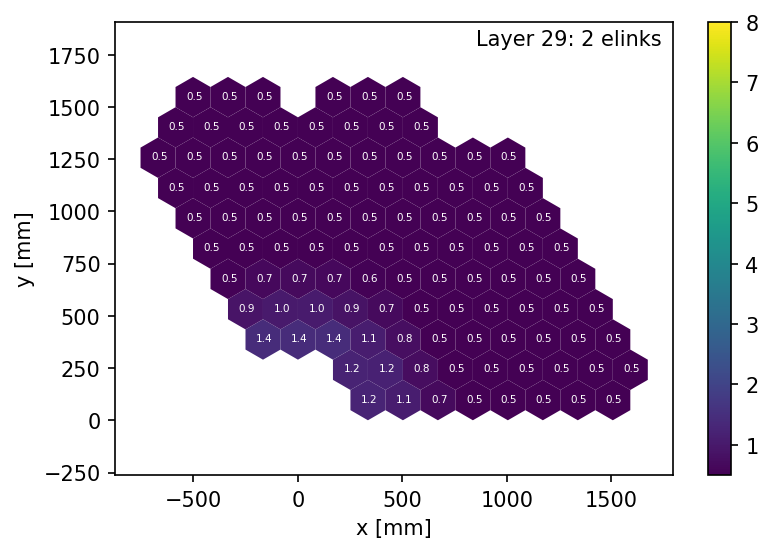

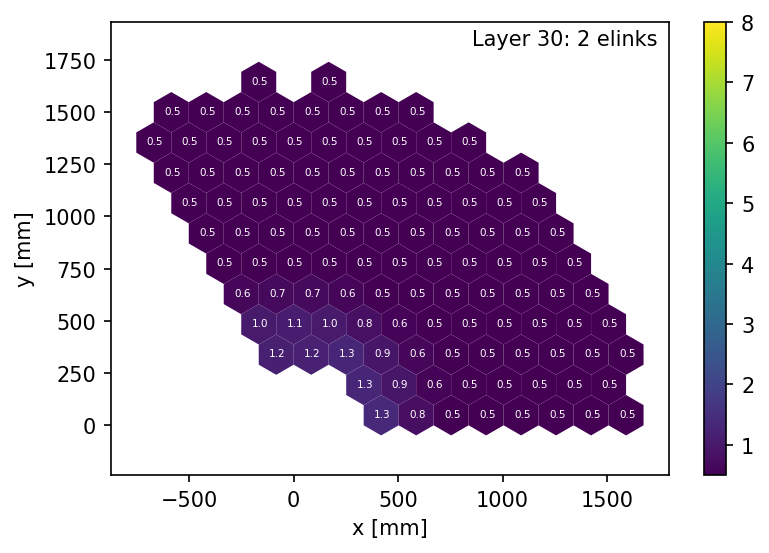

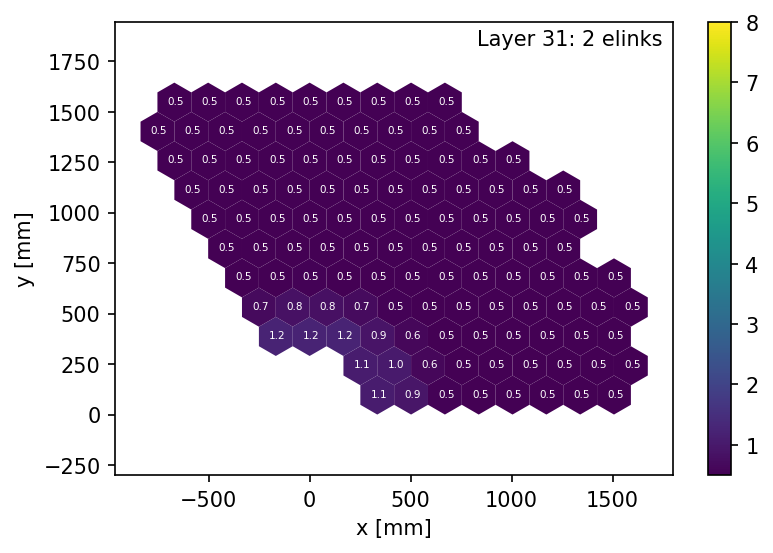

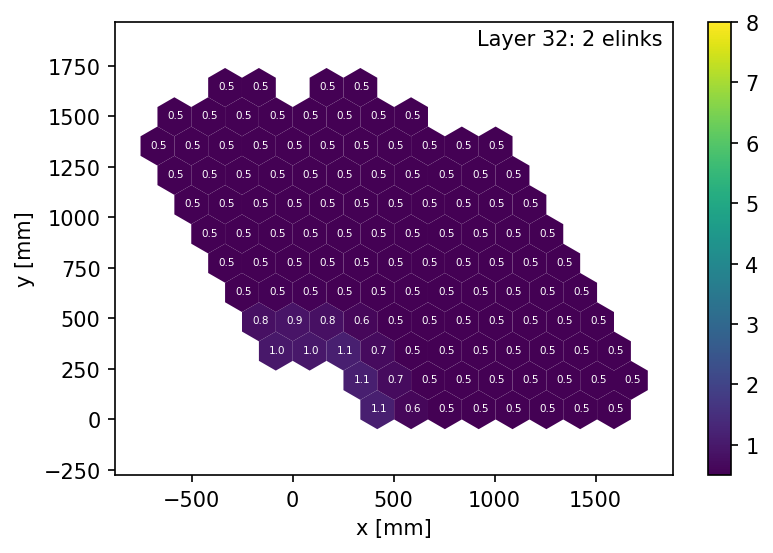

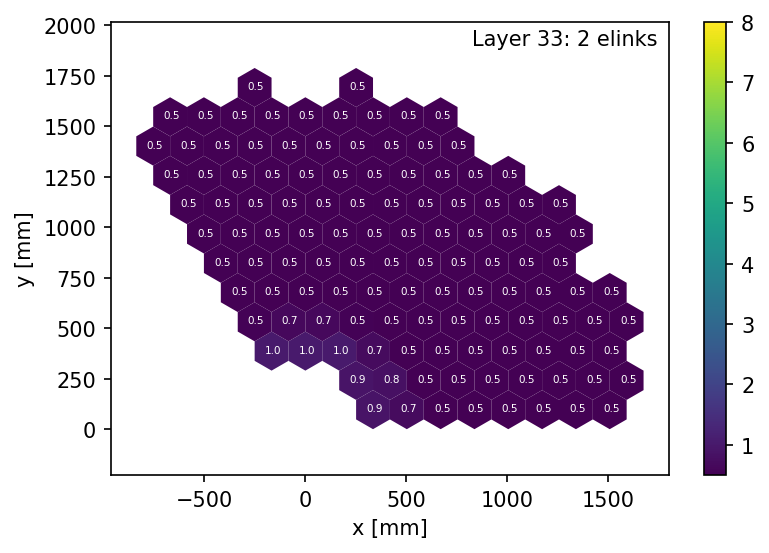

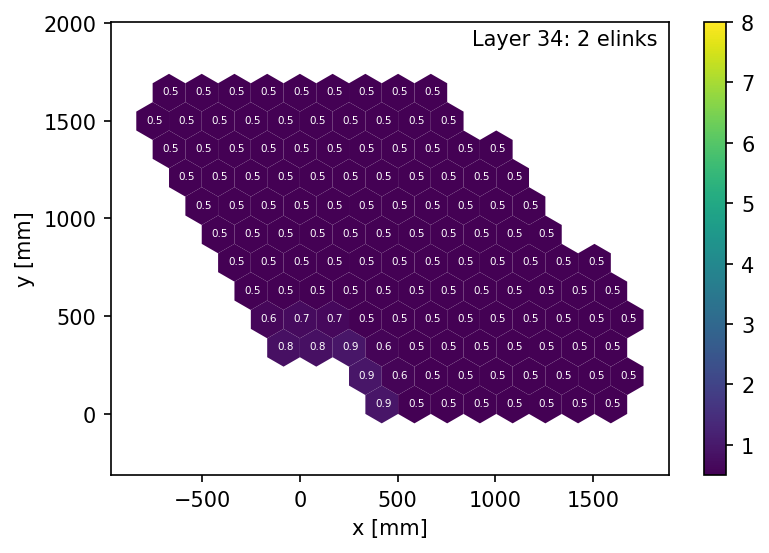

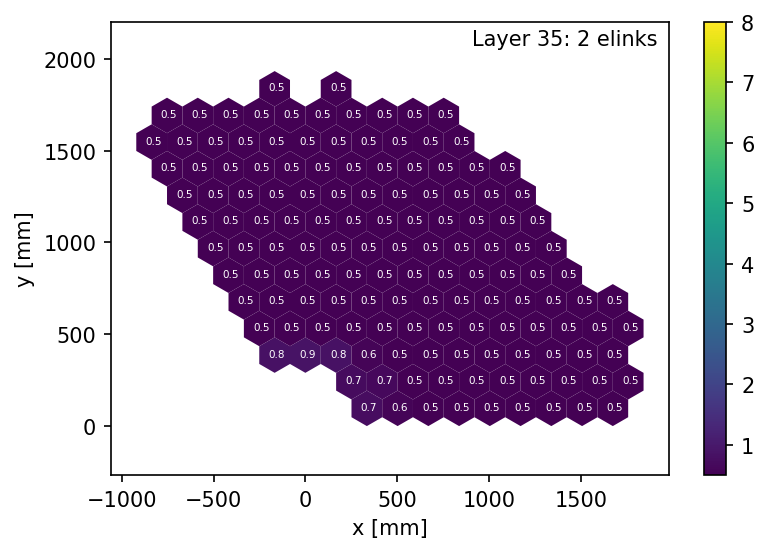

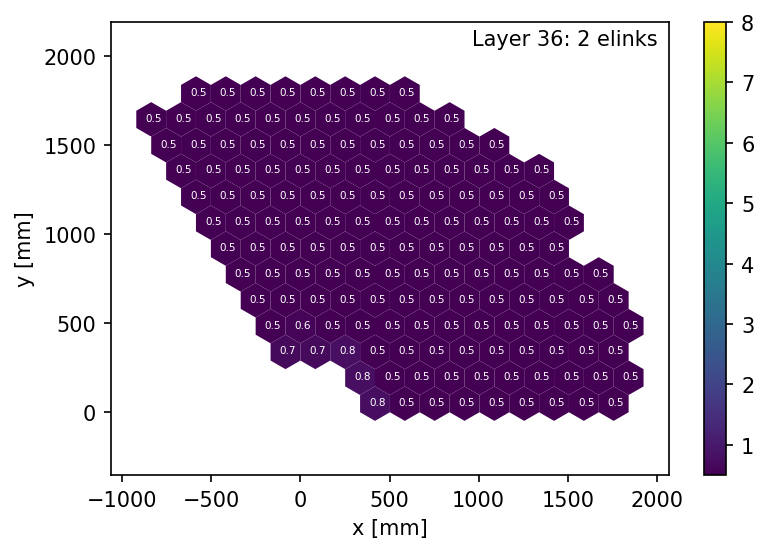

posx and posy should be finite values
posx and posy should be finite values


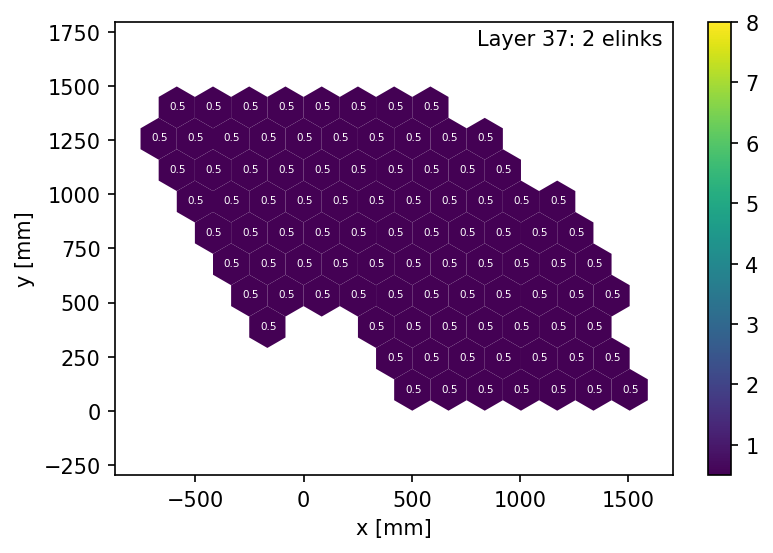

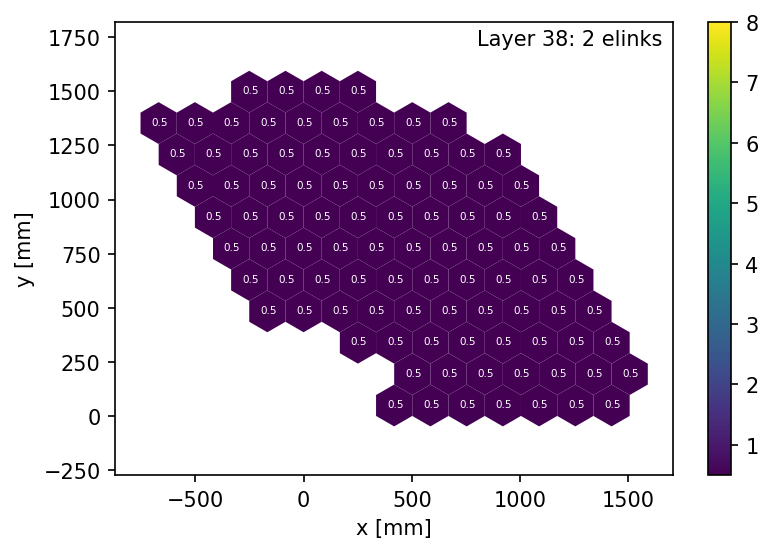

posx and posy should be finite values
posx and posy should be finite values


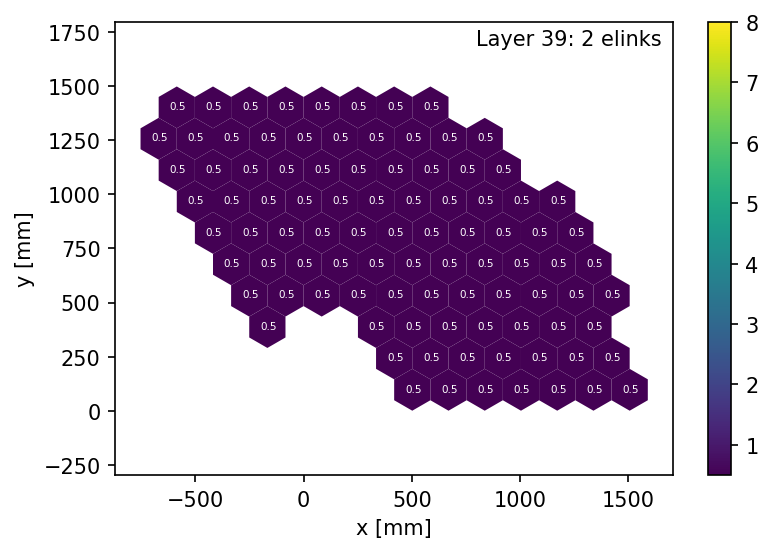

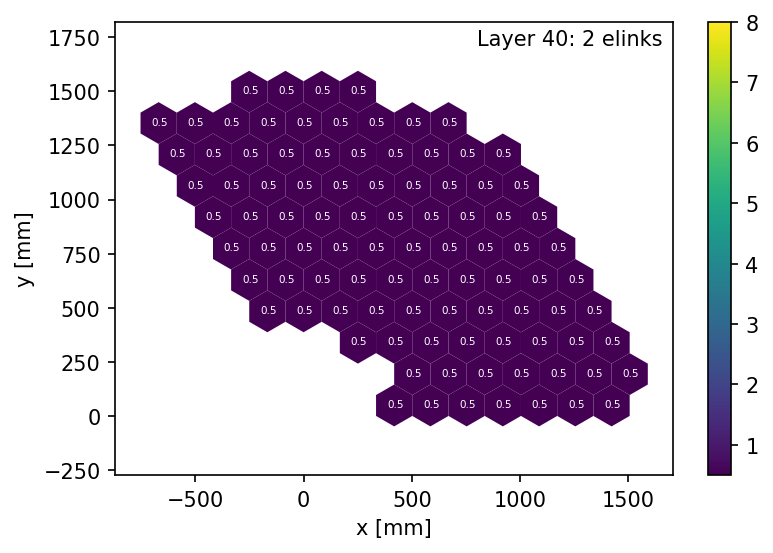

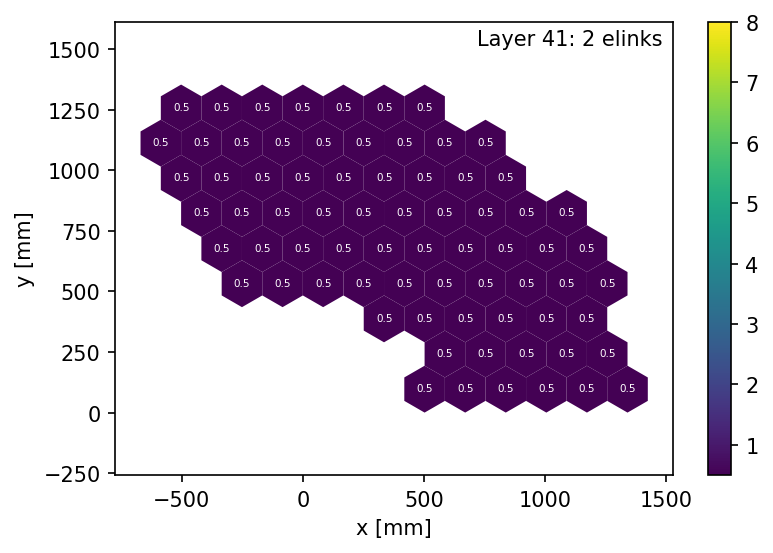

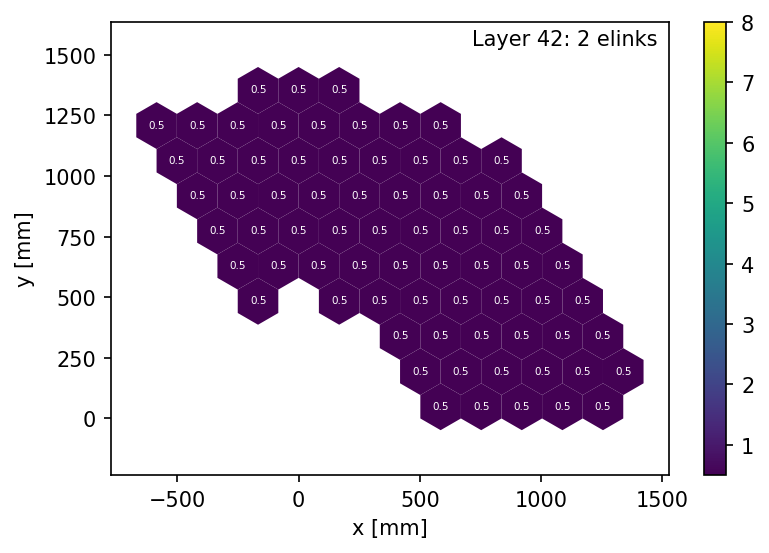

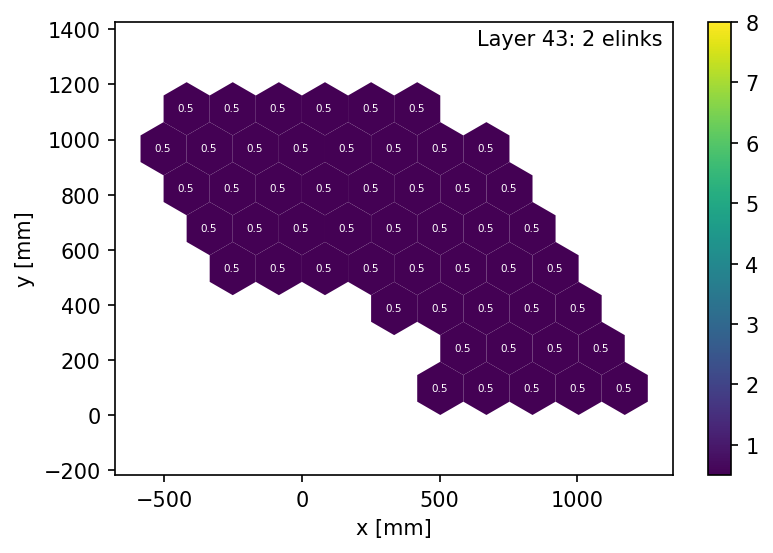

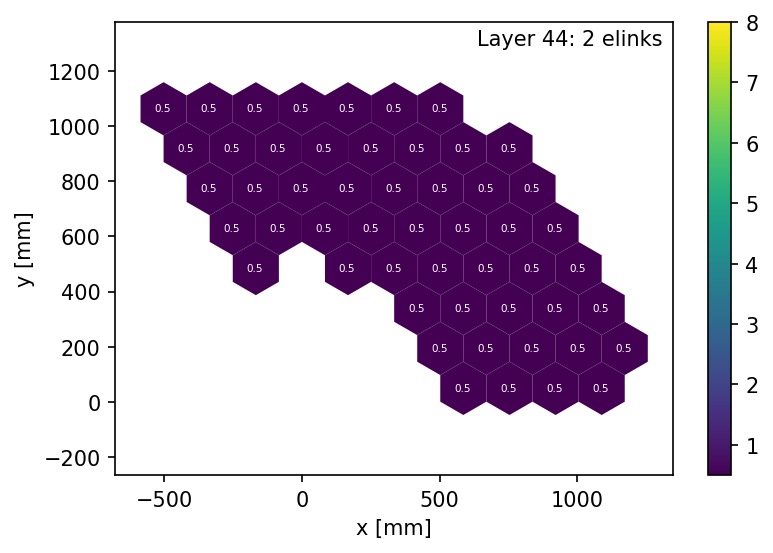

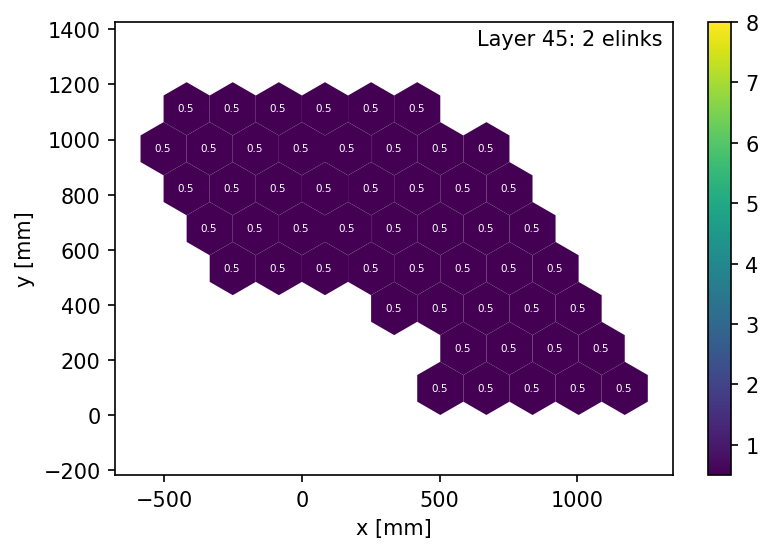

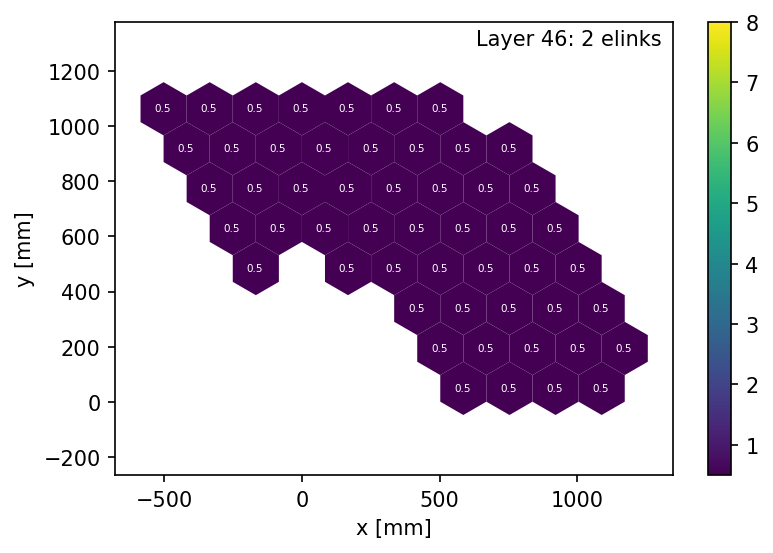

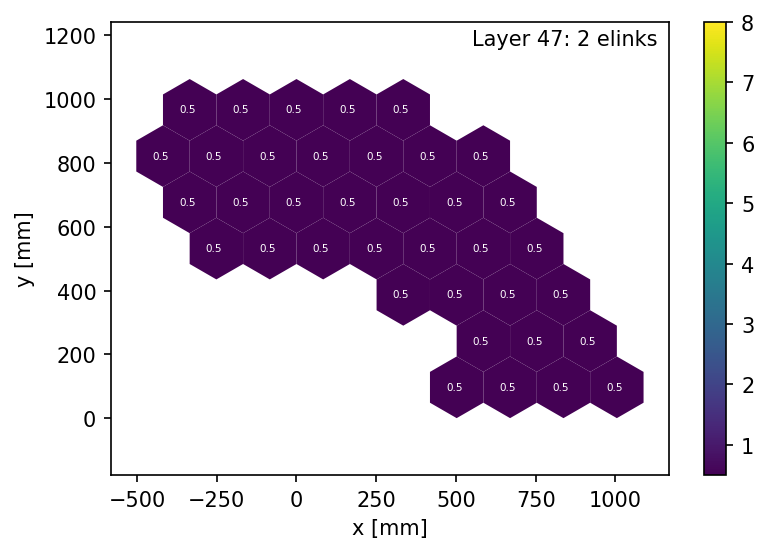

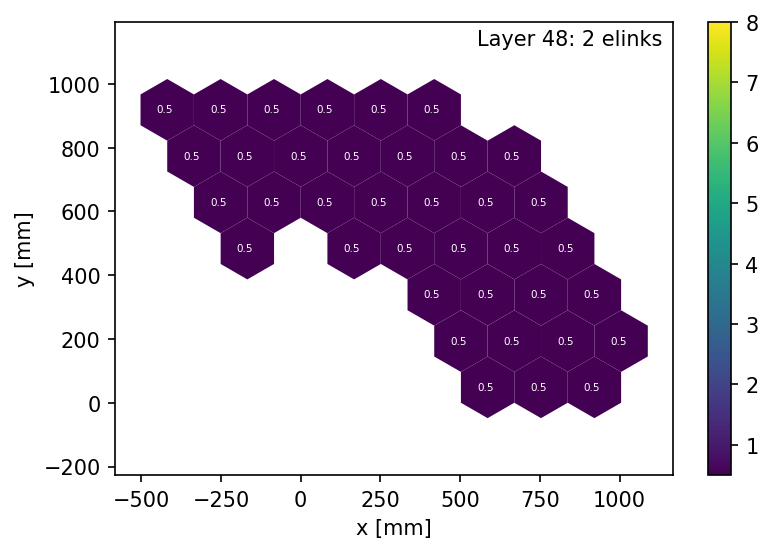

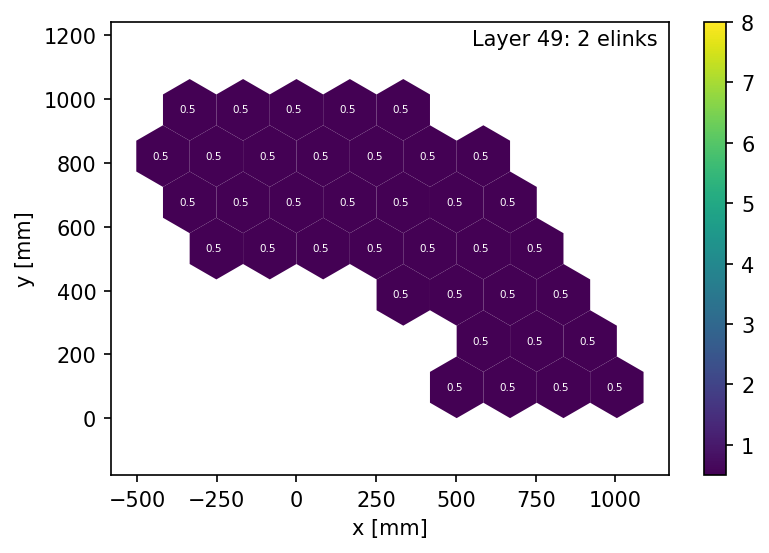

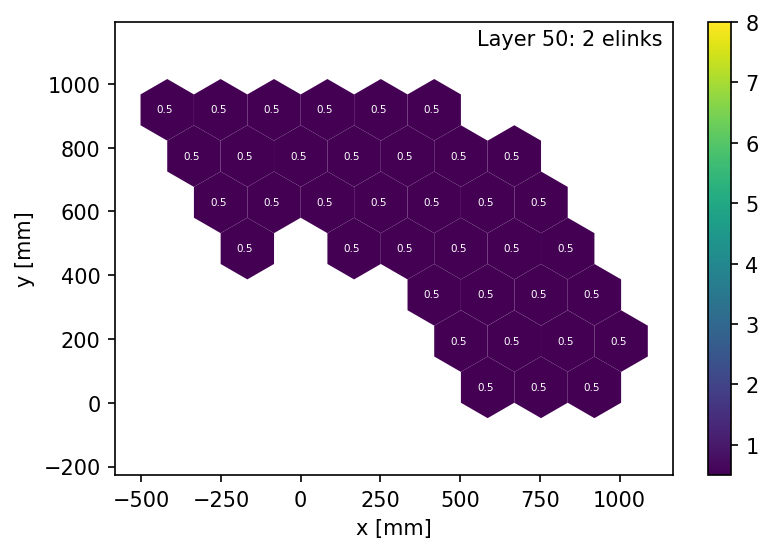

Empty DataFrame
Columns: []
Index: []

In [19]:
df_interpolated.groupby('layer').apply(plot_sector)

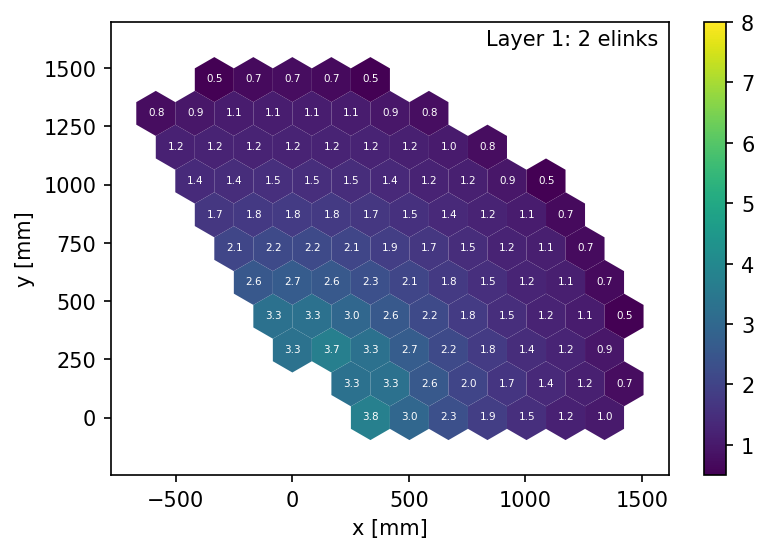

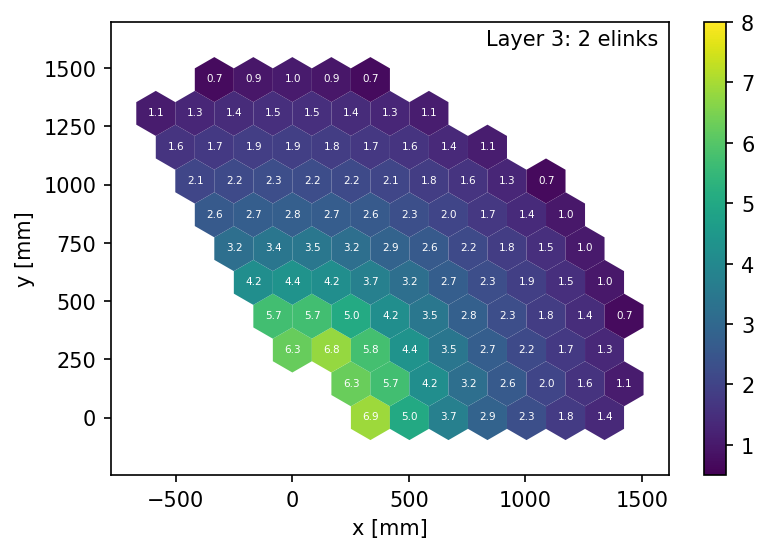

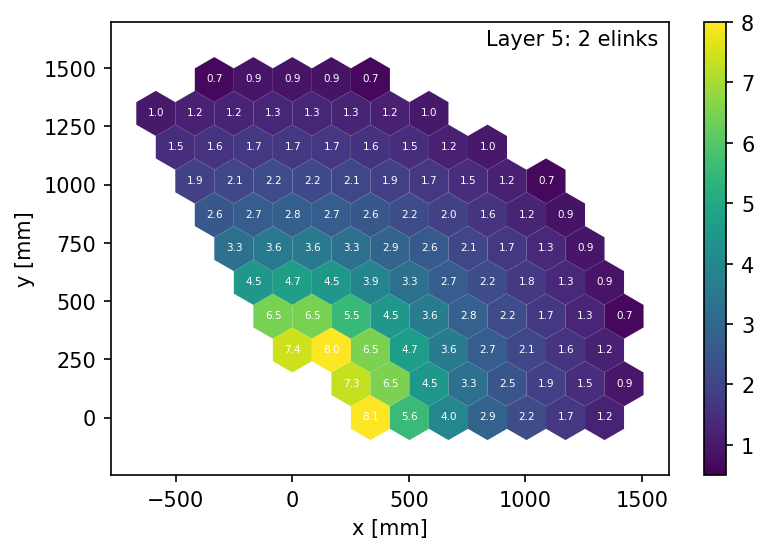

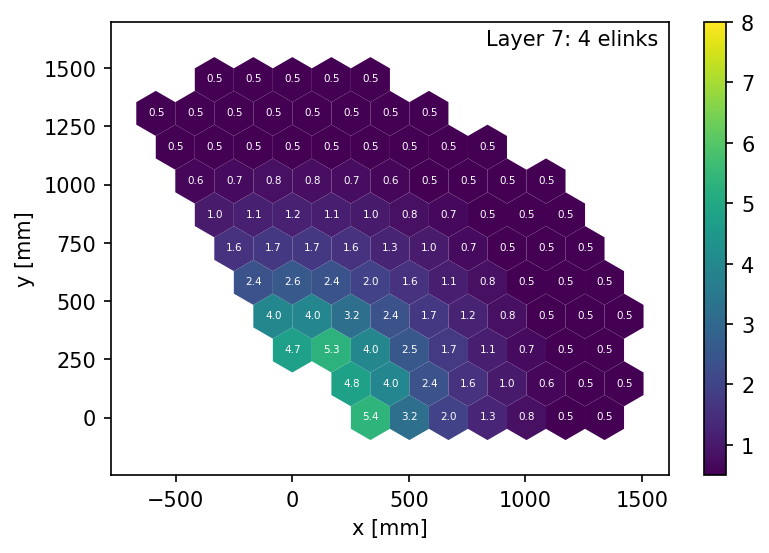

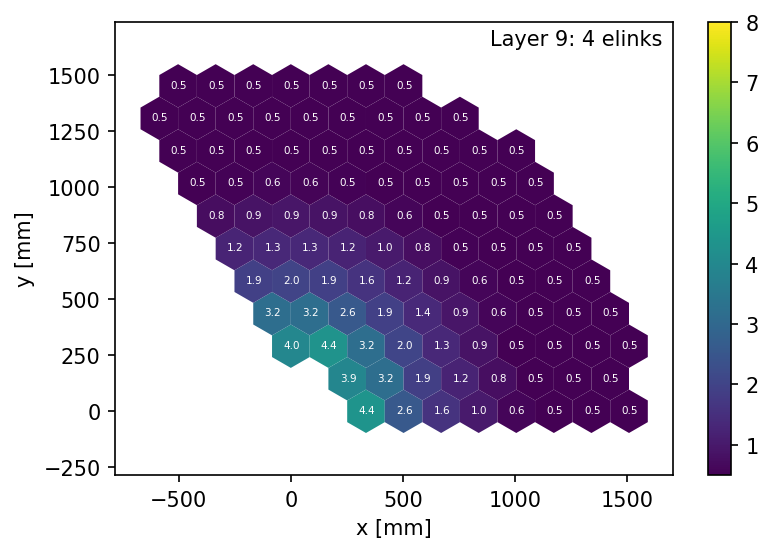

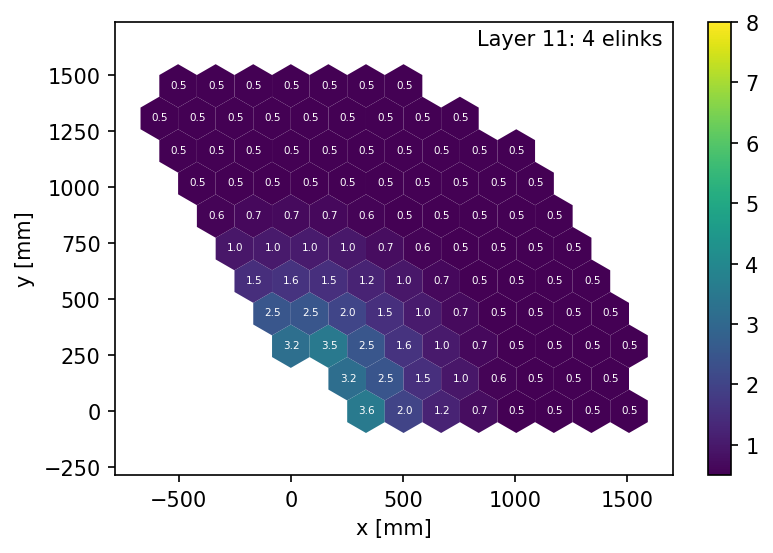

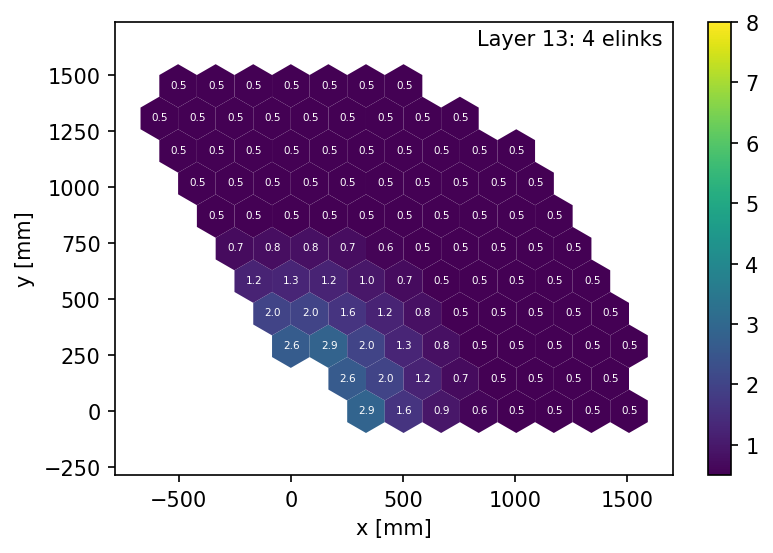

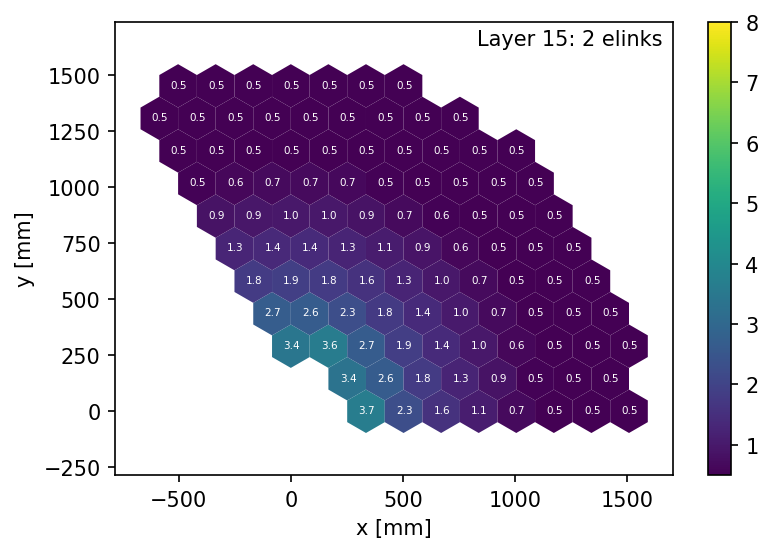

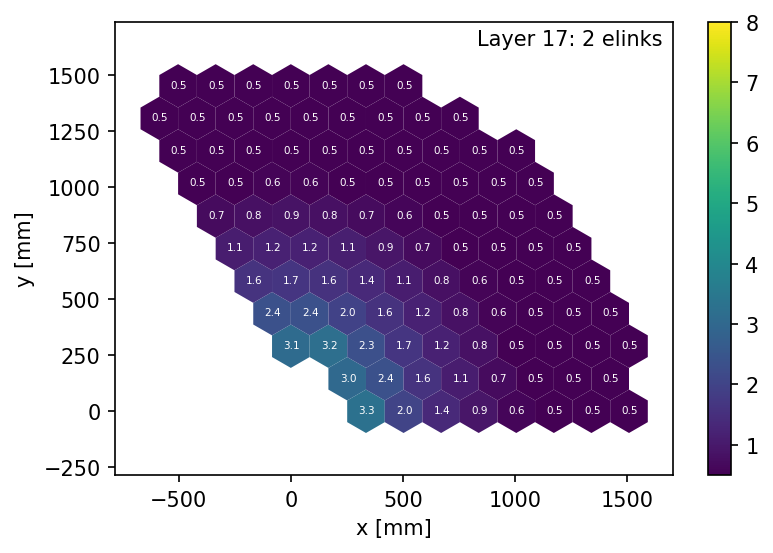

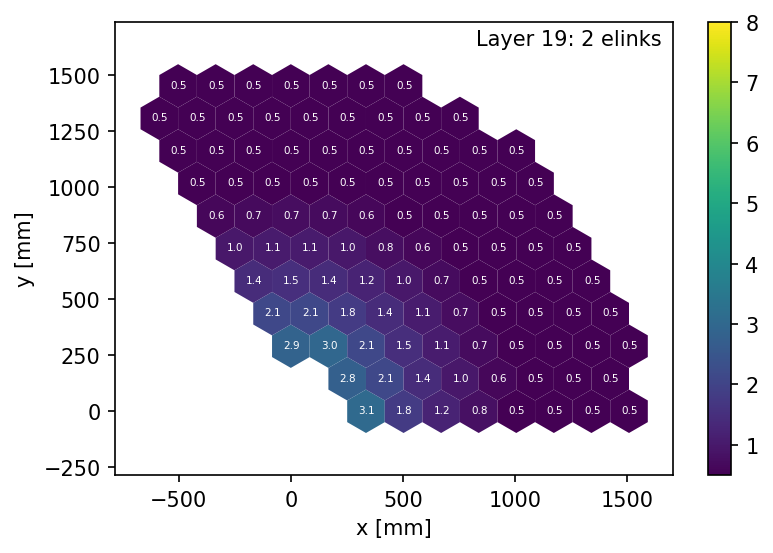

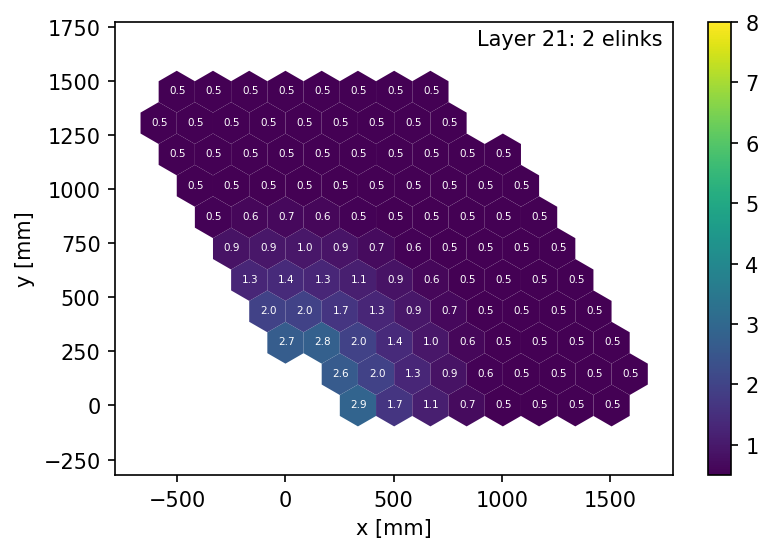

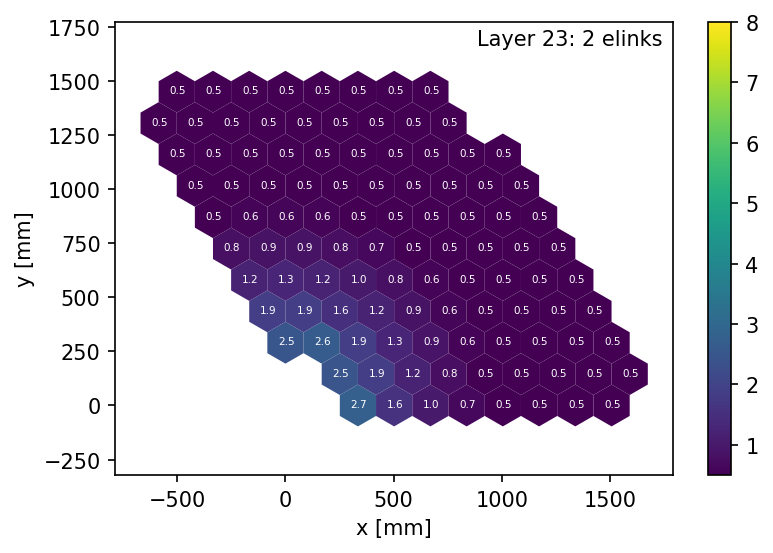

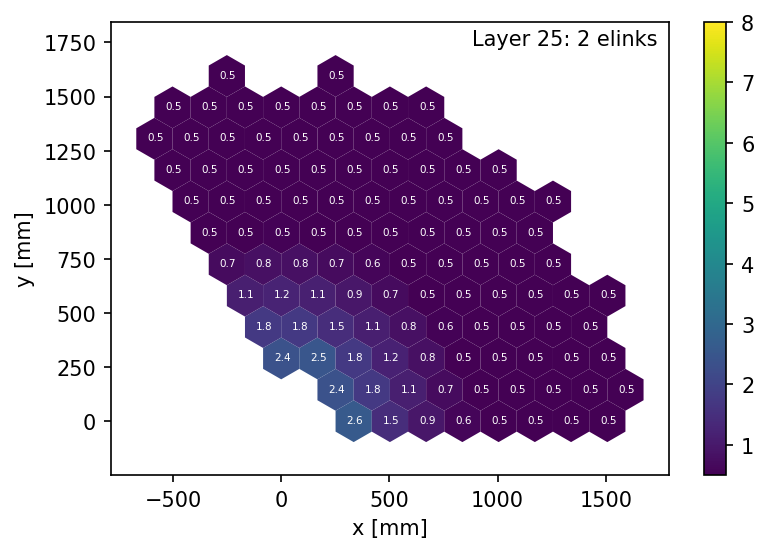

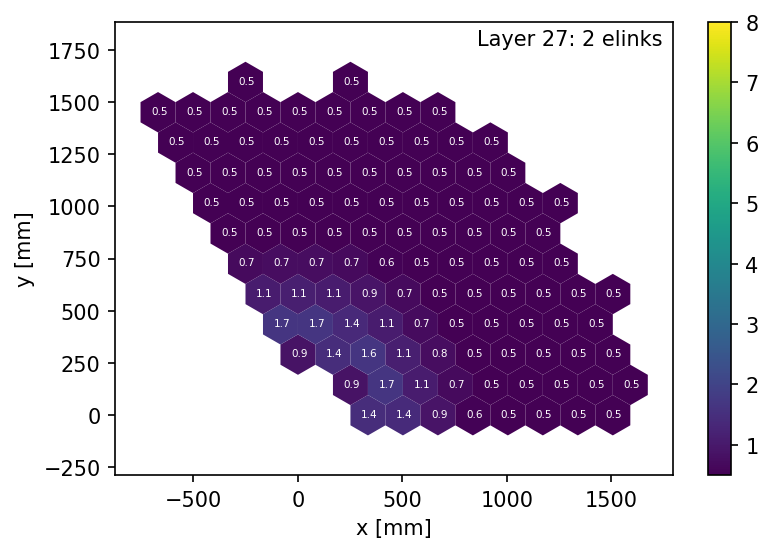

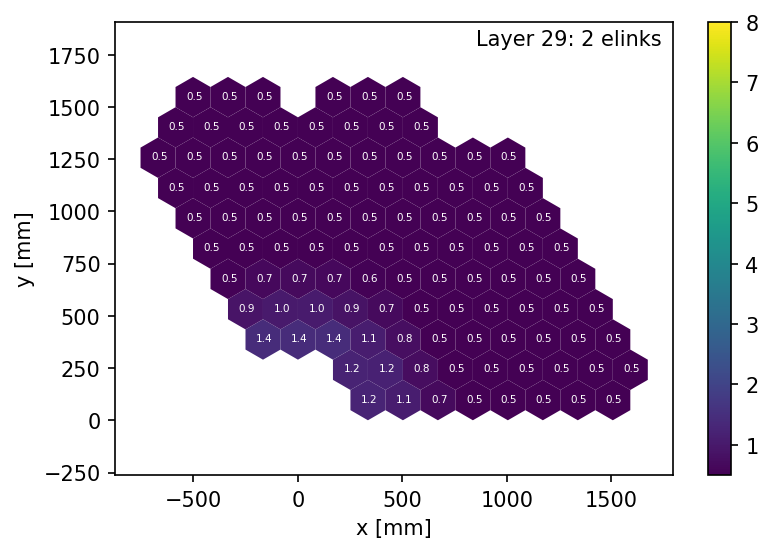

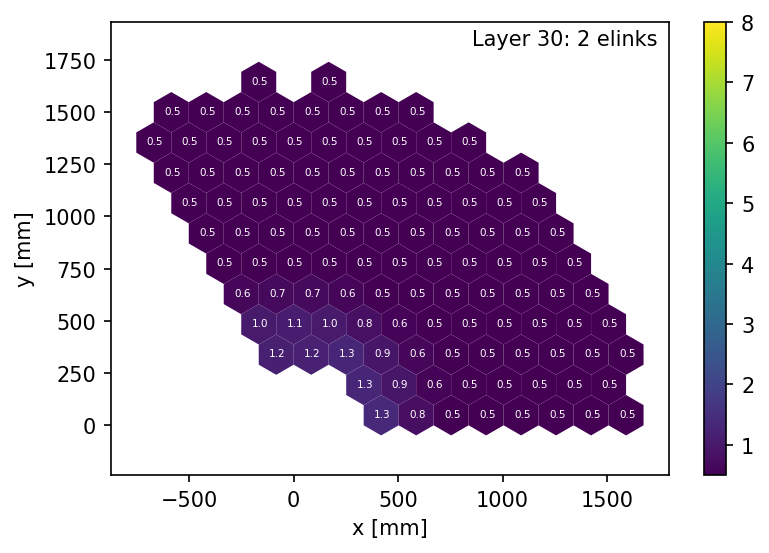

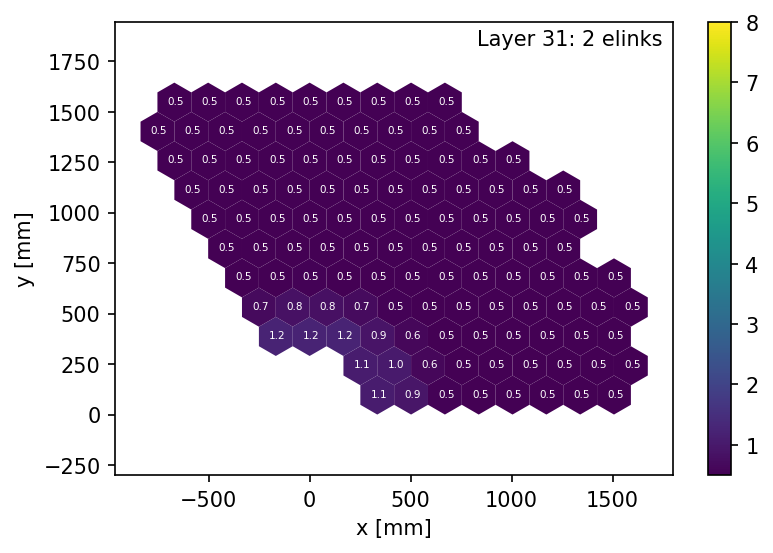

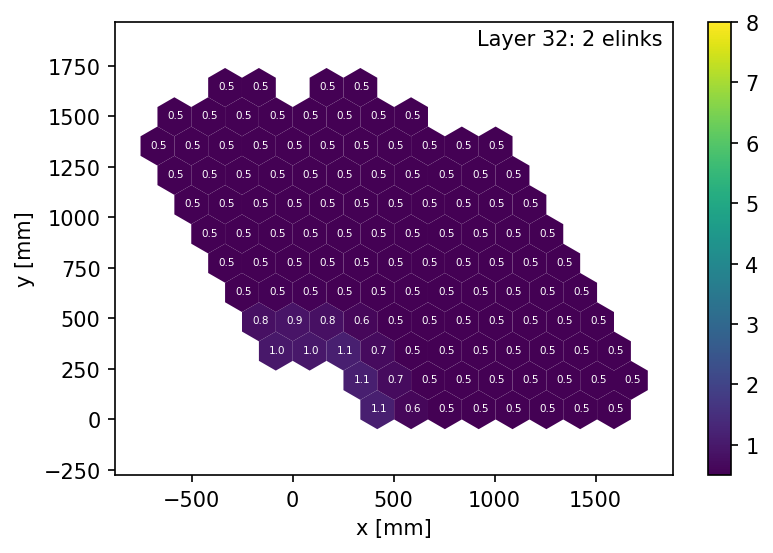

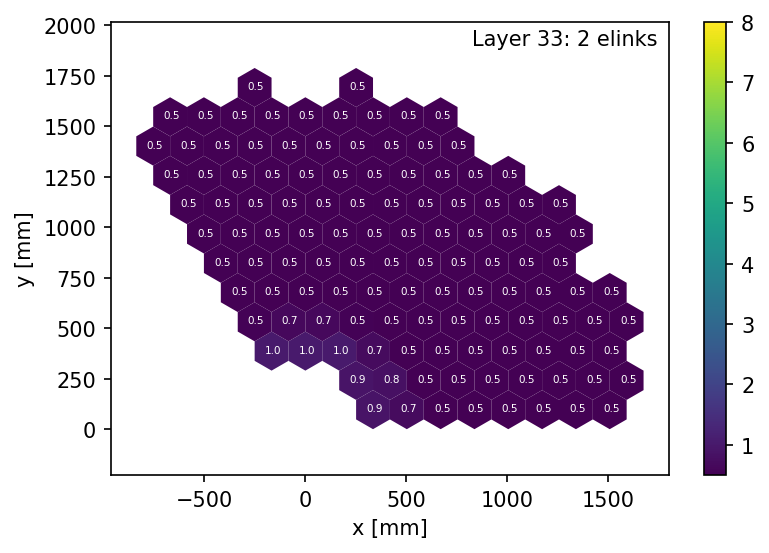

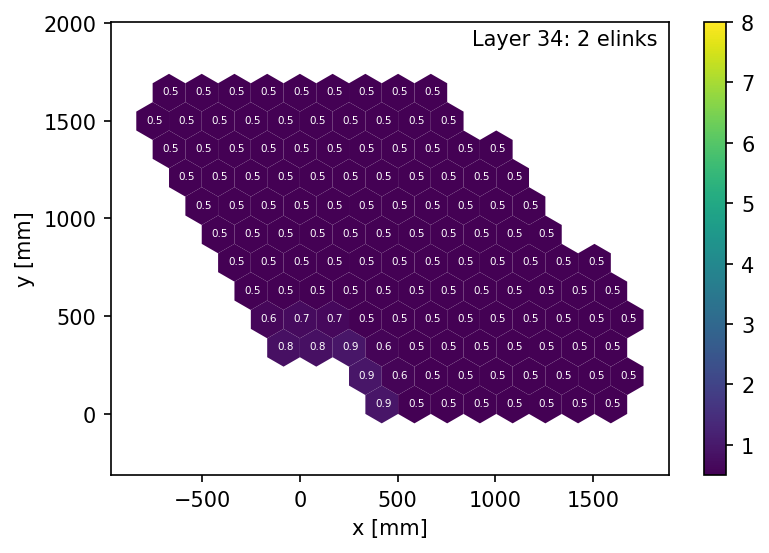

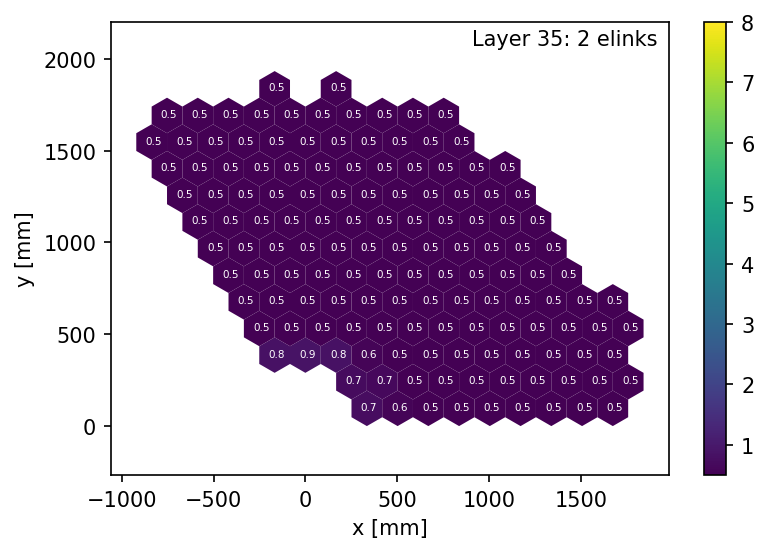

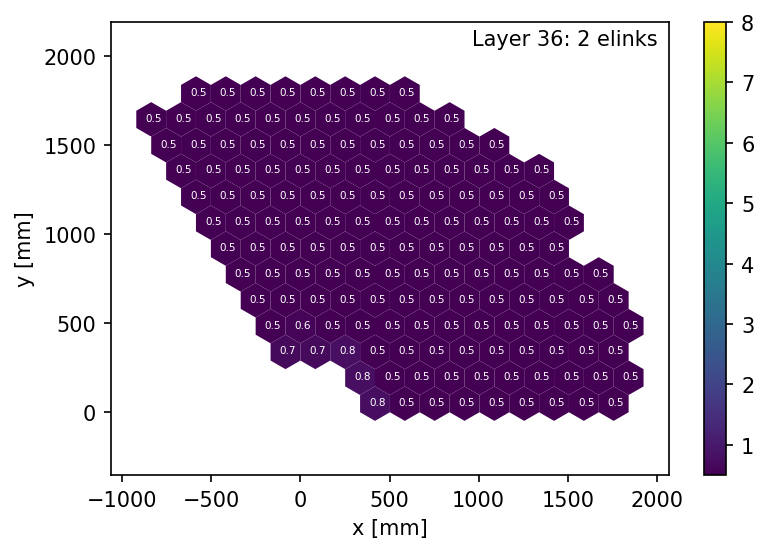

posx and posy should be finite values
posx and posy should be finite values


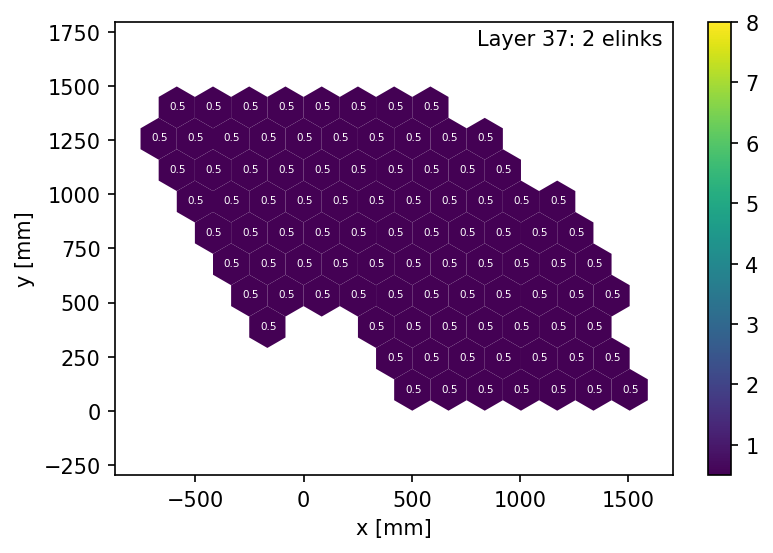

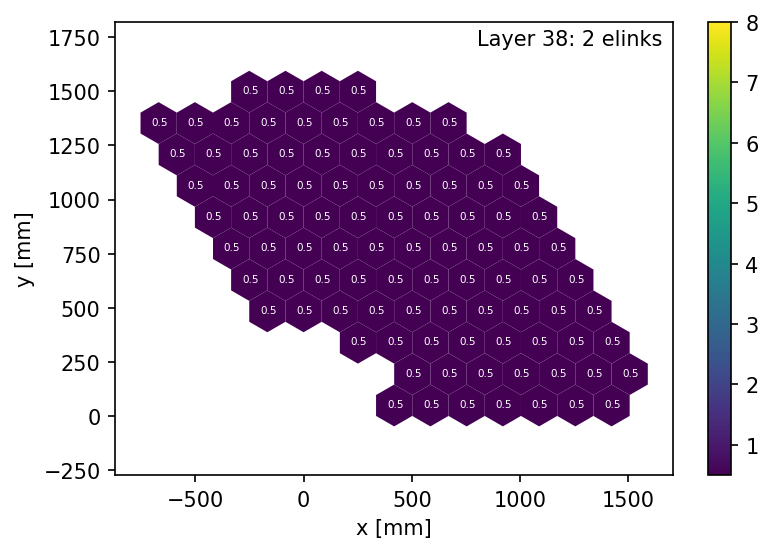

posx and posy should be finite values
posx and posy should be finite values


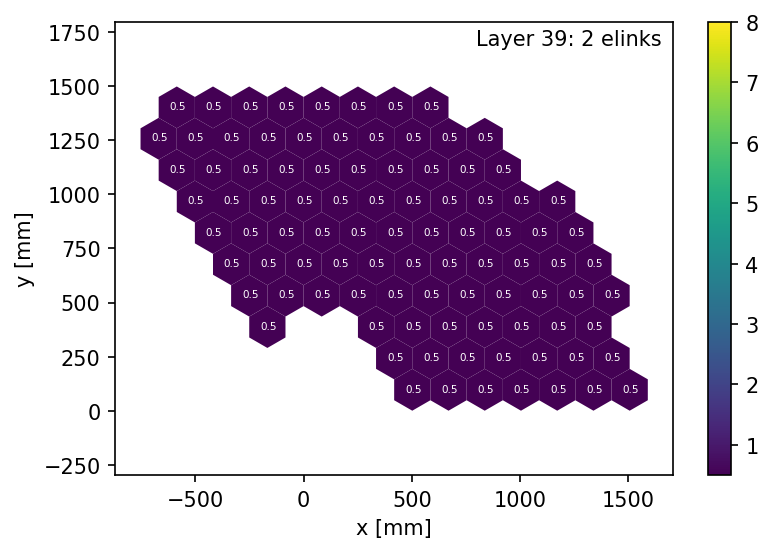

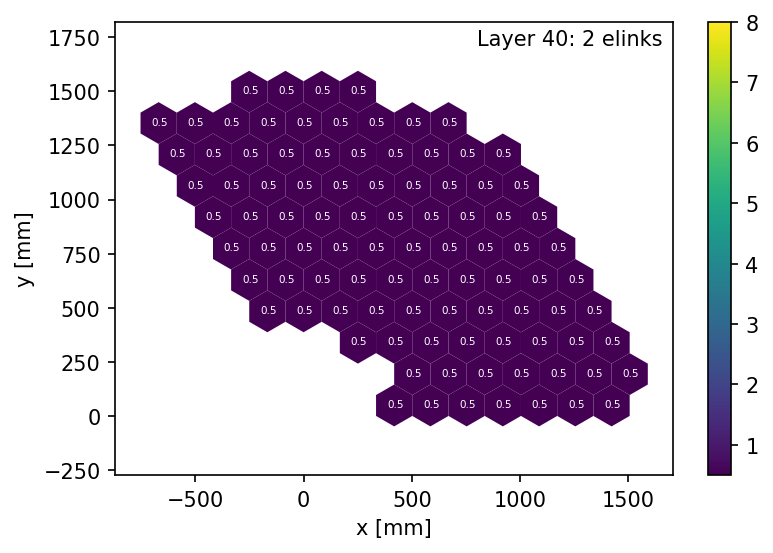

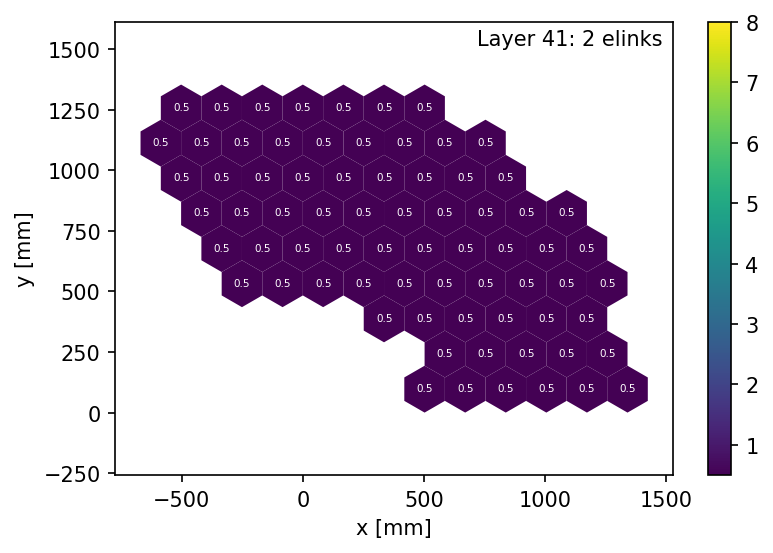

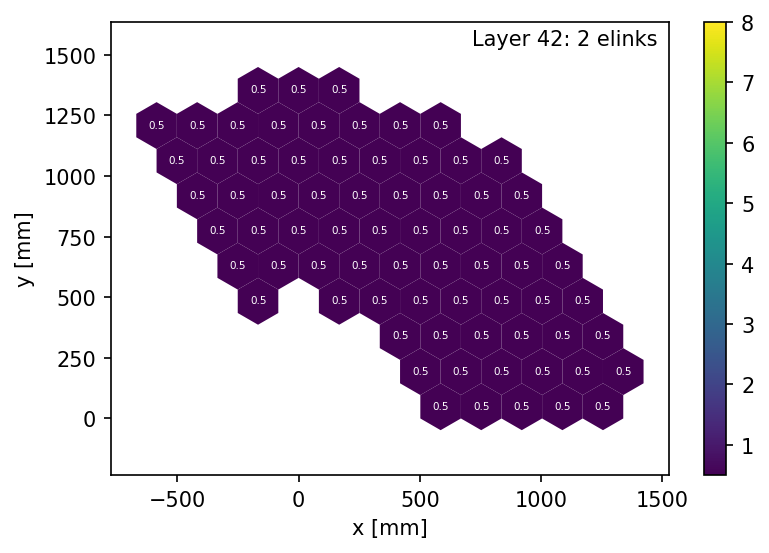

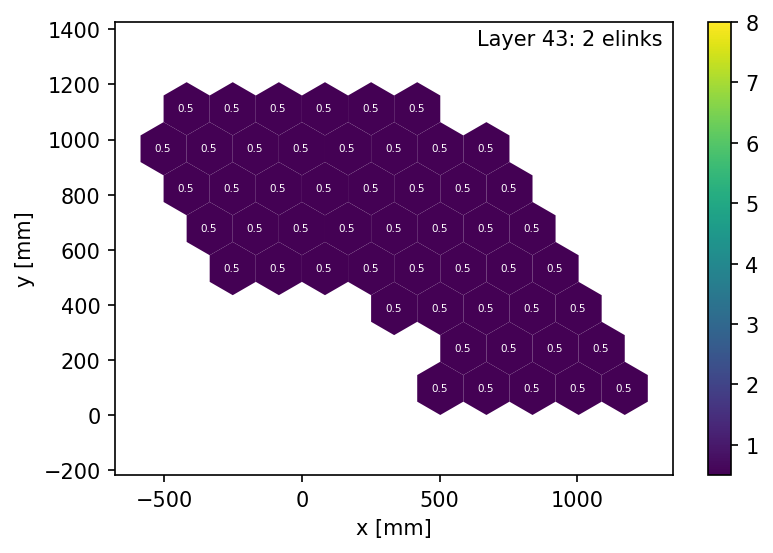

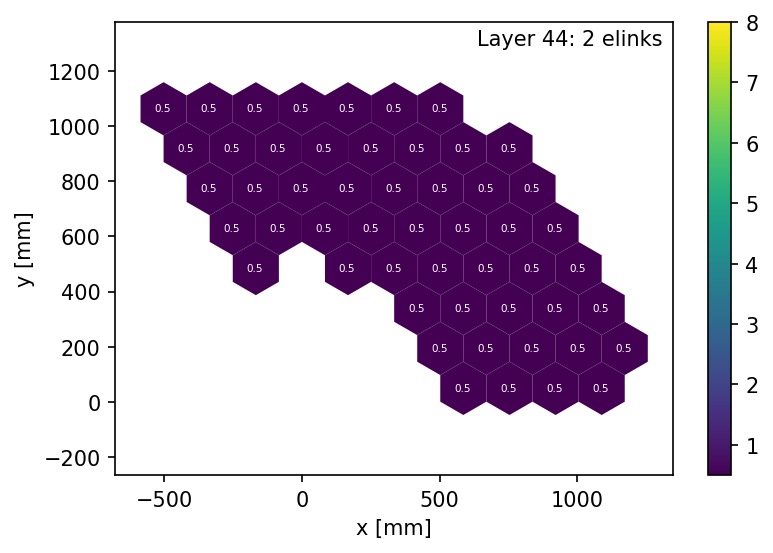

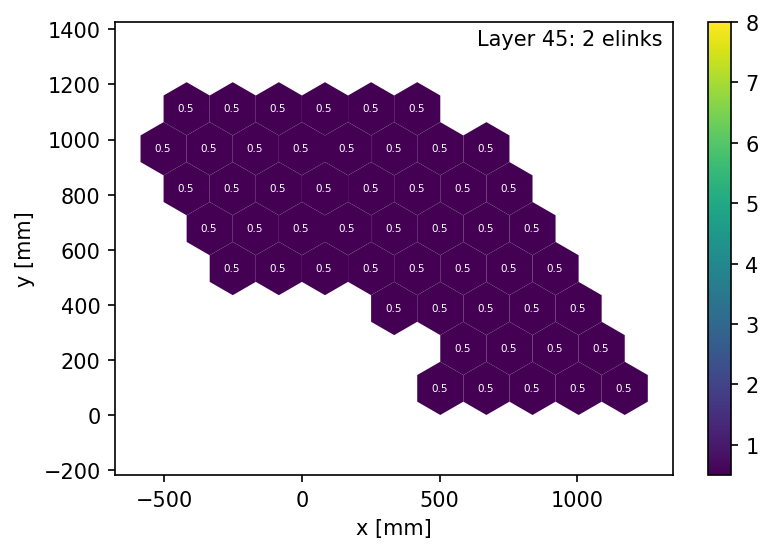

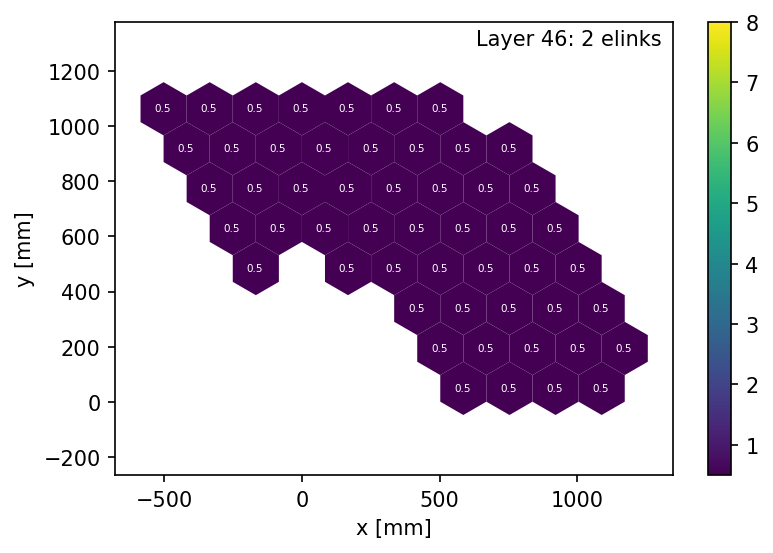

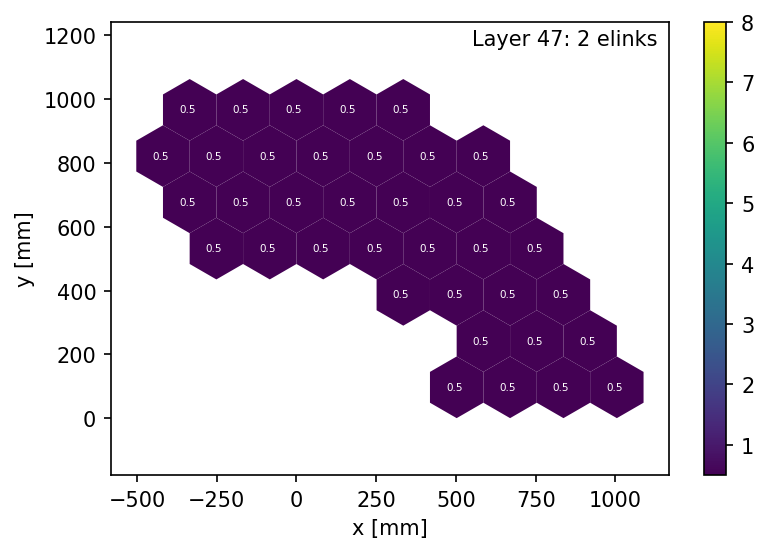

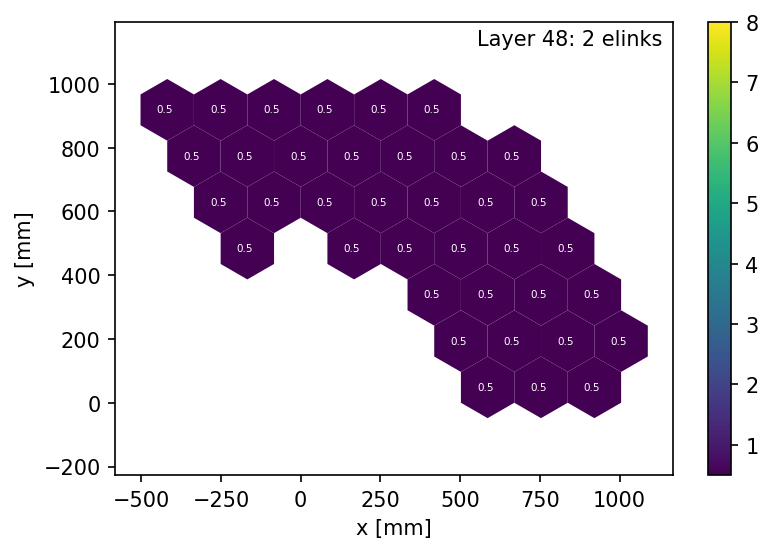

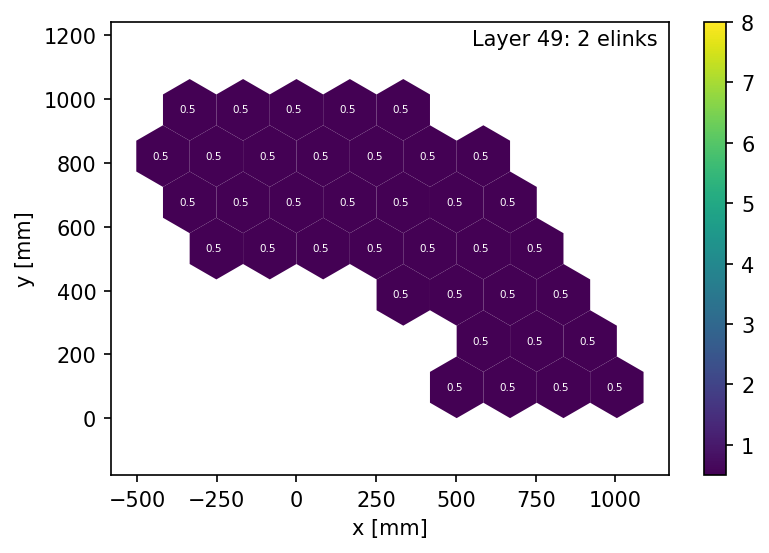

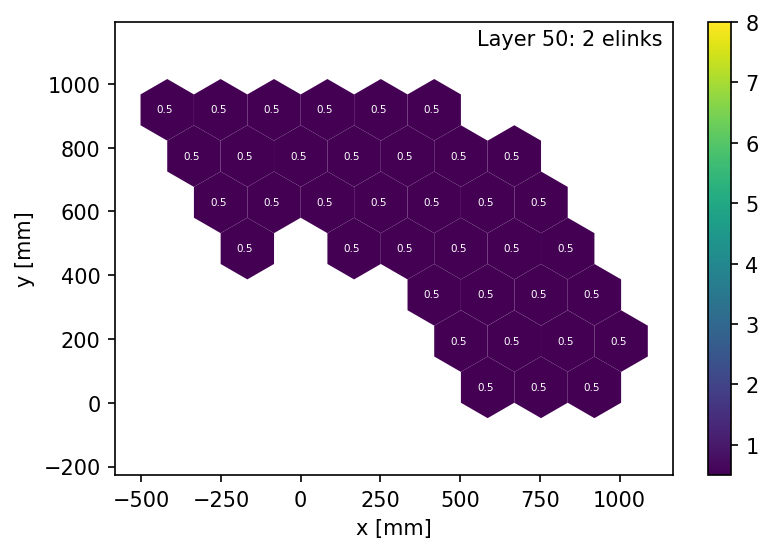

Empty DataFrame
Columns: []
Index: []

In [20]:
df_interpolated.groupby('layer').apply(lambda x: plot_sector(x, links_signaldriven_capped))

In [21]:
def select_links(row):
    layer = row.layer
    elinks = row.elinks
    signaldriven = (links_signaldriven(layer)==elinks)
    signaldriven_capped = (links_signaldriven_capped(layer)==elinks)
    return pd.Series([signaldriven, signaldriven_capped], index=['signaldriven', 'signaldriven_capped'])
    #return [signaldriven, signaldriven_capped]

In [22]:
#df_interpolated['signaldriven'] = False
#df_interpolated['signaldriven_capped'] = False
df_test = pd.concat([df_interpolated, df_interpolated.apply(select_links, axis=1)], axis=1)

In [23]:
df_test.query('signaldriven_capped==True & layer==9')

index  layer  waferu  waferv  elinks  threshold       x       y  \
4983   4983      9       1       2       4       3.96     0.0   290.0   
4996   4996      9       1       3       4       3.17   -83.7   435.0   
5009   5009      9       1       4       4       1.92  -167.4   580.0   
5022   5022      9       1       5       4       1.24  -251.2   725.0   
5035   5035      9       1       6       4       0.76  -334.9   870.0   
...     ...    ...     ...     ...     ...        ...     ...     ...   
6244   6244      9      10       4       4       0.47  1339.5   580.0   
6257   6257      9      10       5       4       0.47  1255.8   725.0   
6270   6270      9      10       6       4       0.47  1172.1   870.0   
6283   6283      9      10       7       4       0.47  1088.4  1015.1   
6296   6296      9      10       8       4       0.46  1004.6  1160.1   

      signaldriven  signaldriven_capped  
4983         False                 True  
4996         False                 True  
5009         False                 True  
5022         False                 True  
5035         False                 True  
...            ...                  ...  
6244         False                 True  
6257         False                 True  
6270         False                 True  
6283         False                 True  
6296         False                 True  

[102 rows x 10 columns]

/opt/exp_soft/llr/python/3.7.0/el7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


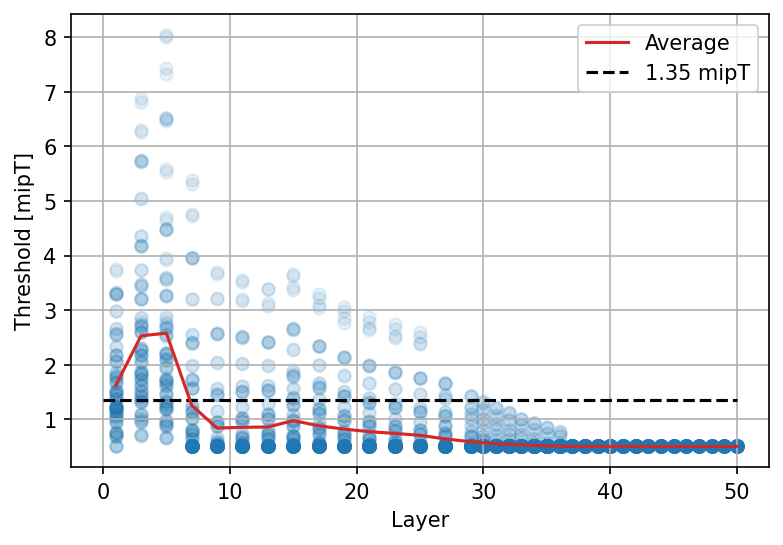

In [24]:
df_signaldriven = df_test[df_test.signaldriven]
df_signaldriven['threshold'] = np.clip(df_signaldriven.threshold.array, 0.5, None)
df_signaldriven_mean = df_signaldriven.groupby('layer').mean()
fig, ax = plt.subplots(dpi=150)
plt.scatter(df_signaldriven.layer, df_signaldriven.threshold, alpha=0.1)
plt.plot(df_signaldriven_mean.threshold, c='tab:red', label='Average')
plt.hlines(1.35, 0, 50, ls='--', label='1.35 mipT')
plt.xlabel('Layer')
plt.ylabel('Threshold [mipT]')
plt.grid()
plt.legend()
#plt.yscale('log')
plt.show()

/opt/exp_soft/llr/python/3.7.0/el7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


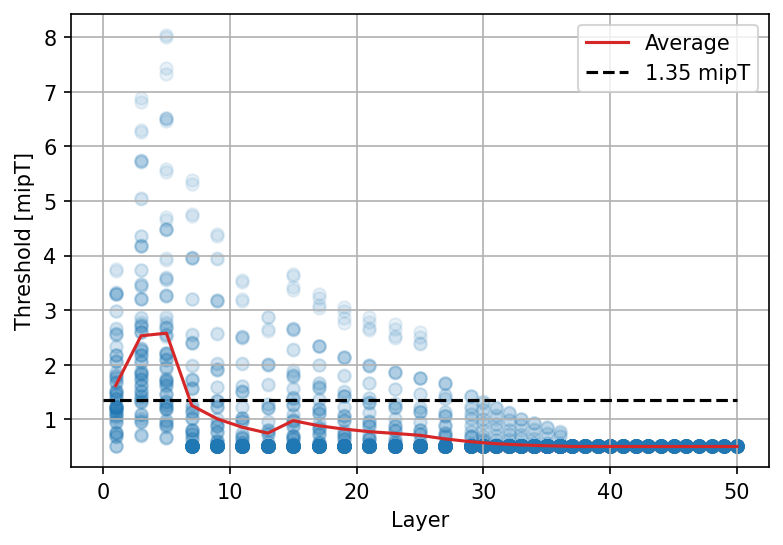

In [25]:
df_signaldriven_capped = df_test[df_test.signaldriven_capped]
df_signaldriven_capped['threshold'] = np.clip(df_signaldriven_capped.threshold.array, 0.5, None)
df_signaldriven_capped_mean = df_signaldriven_capped.groupby('layer').mean()
fig, ax = plt.subplots(dpi=150)
plt.scatter(df_signaldriven_capped.layer, df_signaldriven_capped.threshold, alpha=0.1)
plt.plot(df_signaldriven_capped_mean.threshold, c='tab:red', label='Average')
plt.hlines(1.35, 0, 50, ls='--', label='1.35 mipT')
plt.xlabel('Layer')
plt.ylabel('Threshold [mipT]')
plt.grid()
plt.legend()
#plt.yscale('log')
plt.show()

In [27]:
df_signaldriven[['layer', 'waferu', 'waferv', 'threshold']].set_index(['layer', 'waferu', 'waferv']).to_csv('../scripts/results/thresholds_signaldriven_{}.csv'.format(version), sep=' ')
df_signaldriven_capped[['layer', 'waferu', 'waferv', 'threshold']].set_index(['layer', 'waferu', 'waferv']).to_csv('../scripts/results/thresholds_signaldrivencapped_{}.csv'.format(version), sep=' ')

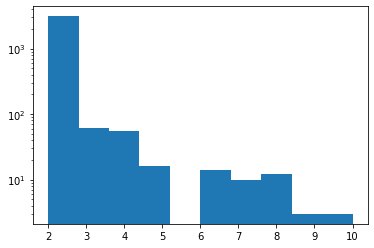

In [139]:
min_elinks = df_interpolated.groupby(['layer', 'waferu', 'waferv']).min()['elinks']
plt.hist(min_elinks.array)
plt.yscale('log')
plt.show()

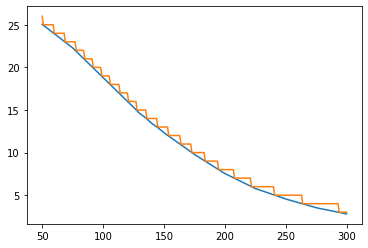

In [60]:
plt.plot(df_empty.mean_occupancy.interpolate())
plt.plot(np.ceil(df_empty.mean_occupancy.interpolate()))

In [68]:
df_empty['mean_occupancy'] = df_empty.mean_occupancy.interpolate()
df_empty['ntc'] = np.ceil(df_empty.mean_occupancy).astype('int32')

In [71]:
df_empty

threshold  mean_occupancy  ntc
th_index                                
50             0.50       25.050631   26
51             0.51       24.940218   25
52             0.52       24.829805   25
53             0.53       24.719392   25
54             0.54       24.608979   25
...             ...             ...  ...
296            2.96        2.916179    3
297            2.97        2.887149    3
298            2.98        2.858118    3
299            2.99        2.829088    3
300            3.00        2.800057    3

[251 rows x 3 columns]

In [84]:
min_th = df_empty.groupby('ntc').min().reset_index()[['ntc', 'threshold']]
min_th['words'] = min_th.apply(word_count, axis=1)

In [85]:
min_th.set_index('t')

ntc  threshold  words
0     3       2.94      4
1     4       2.64      5
2     5       2.41      6
3     6       2.22      7
4     7       2.08      7
5     8       1.95      8
6     9       1.84      8
7    10       1.73      9
8    11       1.64      9
9    12       1.54     10
10   13       1.45     10
11   14       1.36     11
12   15       1.28     11
13   16       1.21     11
14   17       1.14     12
15   18       1.06     12
16   19       0.99     13
17   20       0.92     13
18   21       0.85     14
19   22       0.78     14
20   23       0.69     15
21   24       0.60     15
22   25       0.51     15
23   26       0.50     16